# Introduction
### **Title:** *Simulation of an Infectious Process on Graphs*


## Specific Objectives of the SIRS Epidemic Model Simulation Project
1. **Understand the Dynamics of the SIRS Model:** To gain a comprehensive understanding of the SIRS epidemic model, focusing on the transitions between susceptible, infected, and recovered states in a population.
2. **Graph-Based Simulation:** To implement a simulation of the SIRS model on an undirected graph where nodes represent individuals and edges represent the contact between them, capturing the social structure of the population.
3. **Investigate the Impact of Transition Probabilities:**
    * To explore how varying the transition probabilities (δ for susceptible to infected, γ for infected to recovered, and β for recovered to susceptible) affects the spread of the epidemic through the network.
    * To identify critical thresholds for these probabilities that significantly alter the course of the epidemic.
4. **Analyze the Role of Network Structure:** To analyze how different underlying graph structures (e.g., random graphs, scale-free networks, small-world networks) influence the dynamics of the epidemic spread.
5. **Comparison with Real-World Data:** To compare the outcomes of the simulation with real-world data on epidemic spreads (where available) to evaluate the model's realism and applicability.
6. **Parameter Sensitivity Analysis:** To conduct a sensitivity analysis on the model parameters (δ, γ, β) to understand their influence on the epidemic's outcomes and identify any non-linear behaviors or tipping points.
7. **Optimization of Control Strategies:** To use the simulation to test hypothetical control strategies (e.g., increasing the recovery rate, temporary immunity) and assess their effectiveness in containing the epidemic.
8. **Develop a User-Friendly Simulation Tool:** To create an interactive simulation tool that allows users to modify parameters (δ, γ, β) and graph structures, enabling educators, students, and researchers to explore epidemic dynamics intuitively..





## Methodology and Implementation
### Introduction to the SIRS Model
The *SIRS* model is an epidemiological model used to simulate how an infectious disease spreads through a population. The model divides the population into three compartments or states:
1. **Susceptible (S):** Individuals in this state are healthy but can become infected if they come into contact with an infected individual.
2. **Infected (I):** Individuals in this state are currently infected with the disease and can transmit it to susceptible individuals.
3. **Recovered (R):** Individuals in this state have recovered from the disease and have gained immunity, making them temporarily resistant to reinfection.
The transitions between these states are governed by three probabilities:
* **δ (Delta):** The probability of a susceptible individual becoming infected upon contact with an infected individual. This transition represents the spread of the disease.
* **γ (Gamma):** The probability of an infected individual recovering and moving into the recovered state. This transition represents the process of recovery.
* **β (Beta):** The probability of a recovered individual losing immunity and becoming susceptible again. This transition models the waning immunity over time, making individuals susceptible to the disease once more




### Setup the Environment
We will use:
* **networkx:** For creating and manipulating complex networks.
* **numpy:** For efficient numerical computations.
* **matplotlib.pyplot:** For plotting the graph and visualizing the data.
* **FuncAnimation:** For animating the spreading of the desease.
*  **HTML:** For displaying the animation.
*  **pandas:** For data manipulation.
*  **os:** To have access to the data.
*  **Pool:** For parallel processing.
*  **jit:** The use of Numba's JIT compilation to speed up the simulation loop.
*  **random:**
*  **display:**
*  **clear_output:**
*  **widgets:** To create a GUI for the initial conditions

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import os
from multiprocessing import Pool
from numba import jit
import random
from IPython.display import display, clear_output
import ipywidgets as widgets
import cv2
import time

### Create a Random Graph
Random graphs can approximate the complex and often unpredictable nature of real-world social interactions since they help simulate a wide variety of network structures, ranging from highly connected to sparsely connected networks, hence capturing the heterogeneity seen in real populations.

While **Erdős-Rényi (ER)** graphs are useful for their simplicity and for modeling random interactions within a population since they lead to a homogeneous mixing pattern, however, they are not the best representation forSIRS models (especially when we're considering recovery and the possibility of reinfection), because real-world social networks are often heterogeneous, with variations in node degree (i.e., *some individuals have more contacts than others*), which can significantly affect disease spread and recovery dynamics.

Instead we will use some other alternatives like:
1. **Small-World Networks** Capture the clustering and short path lengths observed in many social networks.
2. **Scale-Free Networks:** These networks include a few highly connected nodes that can play a significant role in disease transmission and are more representative of social structures.
3. **Dynamic Networks:** Incorporate changes in network structure over time, allowing for the simulation of contact formation and dissolution.
4. **Networks with Community Structure:** Models that explicitly include community structure can better simulate the spread of diseases within and between communities, reflecting the complexity of real-world interactions.



### Small-World Network VS Scale-Free Networks
For this example, choose ***1*** if you want to generate a **small-world network** using the **Watts-Strogatz model**, and ***2*** if you want to generate a **scale-free network** using the **Barabási–Albert model**.

#### Small-World Networks
* **Characterized by** high clustering and short average path lengths.
* **Initialization:** Distributing initial infected nodes randomly or targeting specific nodes can have varying impacts due to the network's clustering properties and short path lengths, which facilitate rapid spreading to most of the network.
* **Disease Spread:** The high clustering can lead to rapid initial outbreaks, especially if the initial infected nodes are well-connected or if the path lengths allow for quick disease transmission across the network.



#### Scale-Free Networks
* **Characterized by** a power-law degree distribution, with a few nodes having very high degrees (hubs) and many nodes with low degrees.
* **Initialization:** The presence of hubs or highly connected nodes can significantly influence disease spread. Initiating the infection in high-degree nodes can lead to faster and more widespread outbreaks compared to starting in low-degree nodes.
* **Disease Spread:** The heterogeneity in node connectivity leads to non-uniform spreading patterns, with disease transmission potentially being very efficient if it reaches the hubs.



Enter 1 for a small-world network, or 2 for a scale-free network:  2


Scale-free network generated.


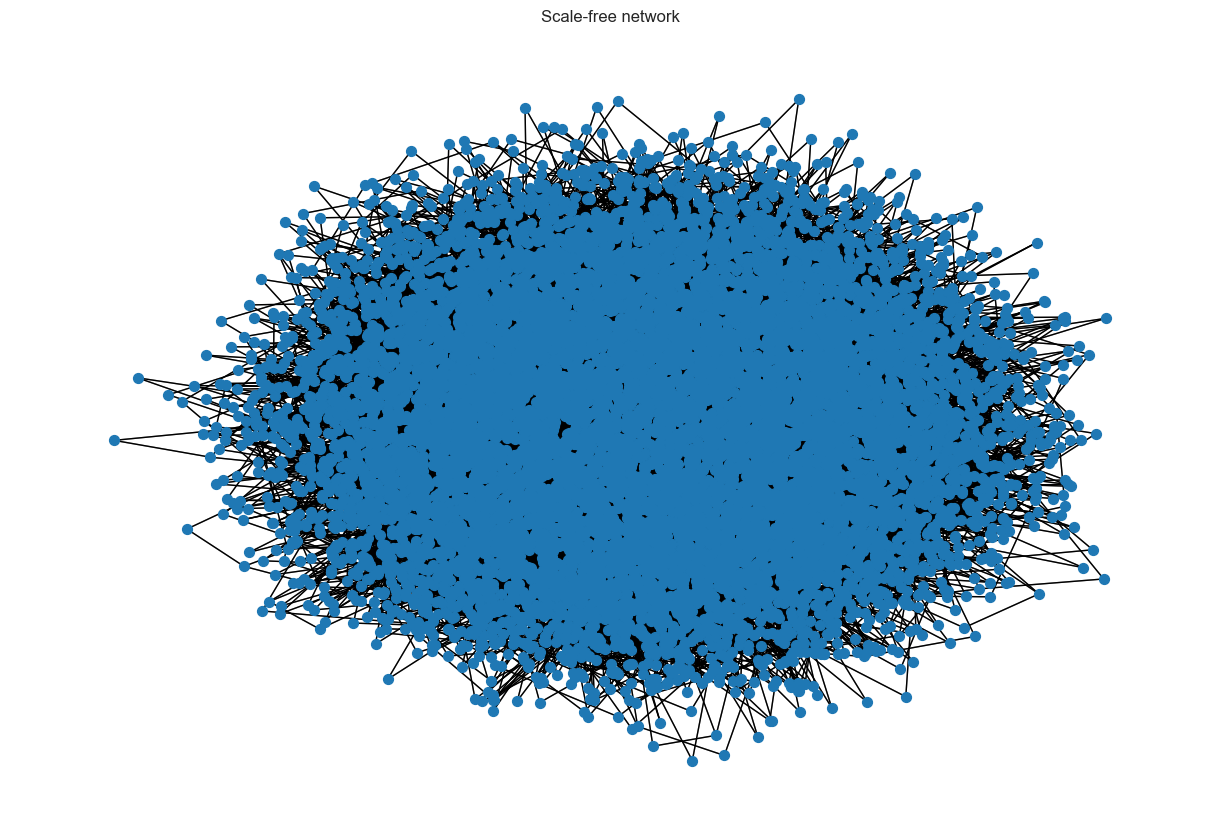

In [75]:
# Prompt the user to choose the type of network
choice = input("Enter 1 for a small-world network, or 2 for a scale-free network: ")

num_nodes = 10000  # number of nodes

if choice == '1':
    # Parameters for the small-world network
    k = 4    # each node is connected to k nearest neighbors in ring topology
    p = 0.05 # the probability of rewiring each edge
    G = nx.connected_watts_strogatz_graph(num_nodes, k, p)
    title = "Small-world network"
    print("Small-world network generated.")
elif choice == '2':
    # Parameters for the scale-free network
    G = nx.barabasi_albert_graph(num_nodes, 2)
    title = "Scale-free network"
    print("Scale-free network generated.")
else:
    print("Invalid choice. Please enter 1 or 2.")
    G = None

if G is not None:
    
    pos = nx.spring_layout(G)  # positions for all nodes
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=50)
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    plt.title(title)
    plt.show()

In [76]:
def visualize_network(G, title):
    """
    visualize the network with states.

    Parameters:
    - G: The networkx graph object with node attributes 'state'.
    - title: the title of the plot.
    """
    color_map = {'S': 'lightblue', 'I': 'red', 'R': 'green'}
    node_colors = [color_map[G.nodes[node]['state']] for node in G.nodes()]
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, node_color=node_colors, with_labels=False, node_size=50)
    plt.title(title)
    plt.show()

### Simulate the SIRS Process
In each time step, the following transitions can occur for each node based on the model's rules and the probabilities δ (susceptible to infected), γ (infected to recovered) and β (recovered to susceptible).
1. **Susceptible to Infected (δ):** A susceptible node becomes infected with probability δ if it has at least one infected neighbor.
2. **Infected to Recovered (γ):** An infected node transitions to the recovered state with probability γ.
3. **Recovered to Susceptible (β):** A recovered node becomes susceptible again with probability β.

In [77]:
def simulate_SIRS_step(G, delta, gamma, beta):
    """
    Simulate one time step of the SIRS model and update the graph.

    Parameters:
    - graph: The networkx graph object with node attributes 'state'.
    - delta: Probability of S->I transition.
    - gamma: Probability of I->R transition.
    - beta: Probability of R->S transition.

    Returns:
    - None: The graph object is modified in place.
    """
    new_states = {} # Dictionary to hold new states
    
    for node in G.nodes():
        state = G.nodes[node]['state']
        neighbors = list(G.neighbors(node))
        infected_neighbors = sum(G.nodes[neighbor]['state'] == 'I' for neighbor in neighbors)
        
        # Susceptible to Infected transition
        if state == 'S' and infected_neighbors > 0 and np.random.random() < delta:
                new_states[node] = 'I'
        
        # Infected to Recovered transition
        if state == 'I' and np.random.random() < gamma:
                new_states[node] = 'R'
                
        # Recovered to Susceptible transition
        if state == 'R' and np.random.random() < beta:
                new_states[node] = 'S'
    
    # Update the states in the graph
    nx.set_node_attributes(G, new_states, 'state')

### Run the simulation
The simulation runs for a predetermined number of iterations, representing time steps in our model. At each step, the state of each individual in the network is updated based on their current state, the states of their neighbors, and the transition probabilities.
This allows us to study the effects of different parameter values on the epidemic's behavior.

#### Initialize the SIRS Model and plot the network
Let's assign each node a state: *Susceptible (S)*, *Infected (I)*, or *Recovered (R)*. 
Initially, let's start with a small fraction of infected individuals and the rest susceptible, and plot some random simulations below

In [78]:
# Simulation parameters
delta = 0.8 # Probability of S->I transition.
gamma = 0.1 # Probability of I->R transition.
beta = 0.2 # Probability of R->S transition.
infected_ratio = 0.01  # Initial fraction of infected individuals
num_simulations = 50 # Number of simulations
num_steps = 40 # Number of steps

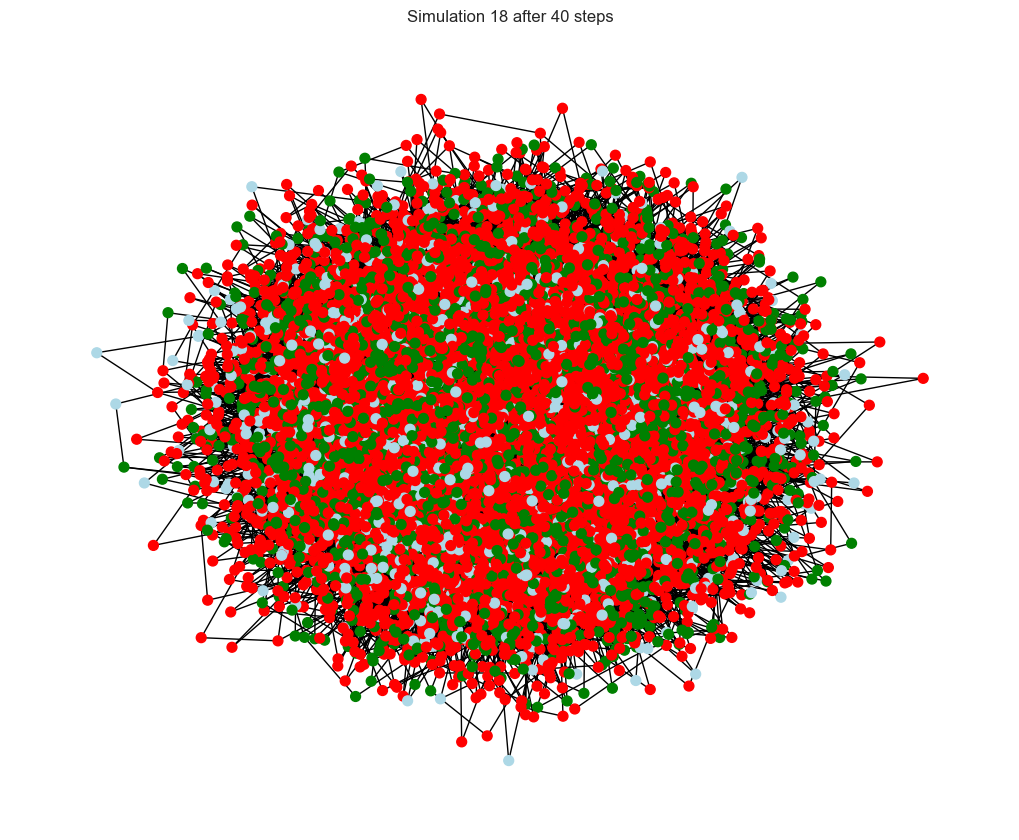

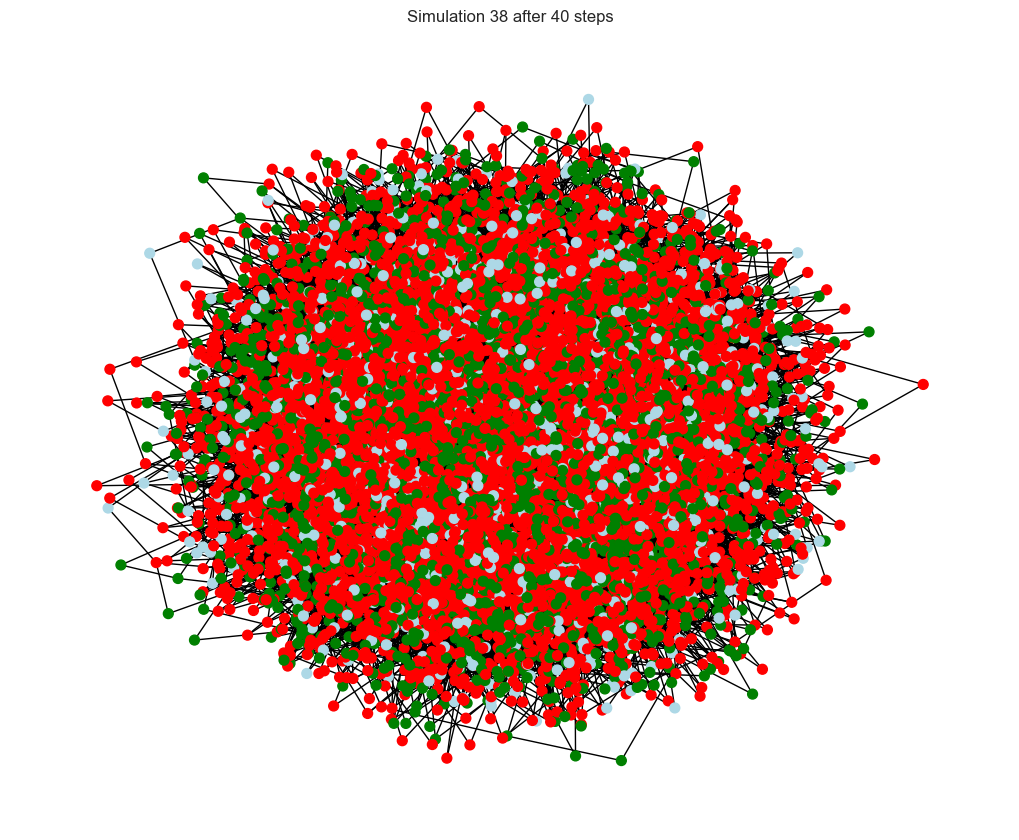

In [79]:
# Initialize arrays to collect simulation data
all_S = np.zeros((num_simulations, num_steps))
all_I = np.zeros((num_simulations, num_steps))
all_R = np.zeros((num_simulations, num_steps))

# Select 2 random simulations to plot
simulations_to_plot = random.sample(range(num_simulations), 2)
plot_counter = 0

# Run multiple simulations
for simulation in range(num_simulations):
    # Use a copy of the graph for each simulation to prevent modifying the original
    G_sim = G.copy()
    
    # Initialize the nodes' state
    for node in G_sim.nodes():
        G_sim.nodes[node]['state'] = 'S'
    initial_infecteds = random.sample(list(G_sim.nodes()), int(len(G_sim) * infected_ratio))
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    # We can Consider targeting high-degree nodes in scale-free networks for initial infection, hence a faster spread.
    if "scale-free" in str(type(G)):
        # Infect high-degree nodes instead of random selection
        degrees = dict(G.degree())
        high_degree_nodes = sorted(degrees, key=degrees.get, reverse=True)[:initial_infected]
        for node in high_degree_nodes:
            G.nodes[node]['state'] = 'I'
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    for node in initial_infecteds:
        G_sim.nodes[node]['state'] = 'I'

    # Run the simulation
    for step in range(num_steps):
        simulate_SIRS_step(G_sim, delta, gamma, beta)  # Implement this function based on the rules of SIRS model
        
        # Count the number of S, I, R individuals and store the counts
        states = nx.get_node_attributes(G_sim, 'state')
        all_S[simulation, step] = sum(state == 'S' for state in states.values())
        all_I[simulation, step] = sum(state == 'I' for state in states.values())
        all_R[simulation, step] = sum(state == 'R' for state in states.values())

    # Plot the network for selected simulations
    if simulation in simulations_to_plot:
        visualize_network(G_sim, f'Simulation {simulation + 1} after {num_steps} steps')
        plot_counter += 1
        if plot_counter >= 2:  # Limit to 2 plots
            break

Let's now plot the I, S, and R and find the equilibrium state

Equilibrium reached at step 18
Mean and std at equilibrium (step 18):
Mean S: 574.20, Std S: 323.20
Mean I: 4848.78, Std I: 2725.23
Mean R: 2177.02, Std R: 1224.30


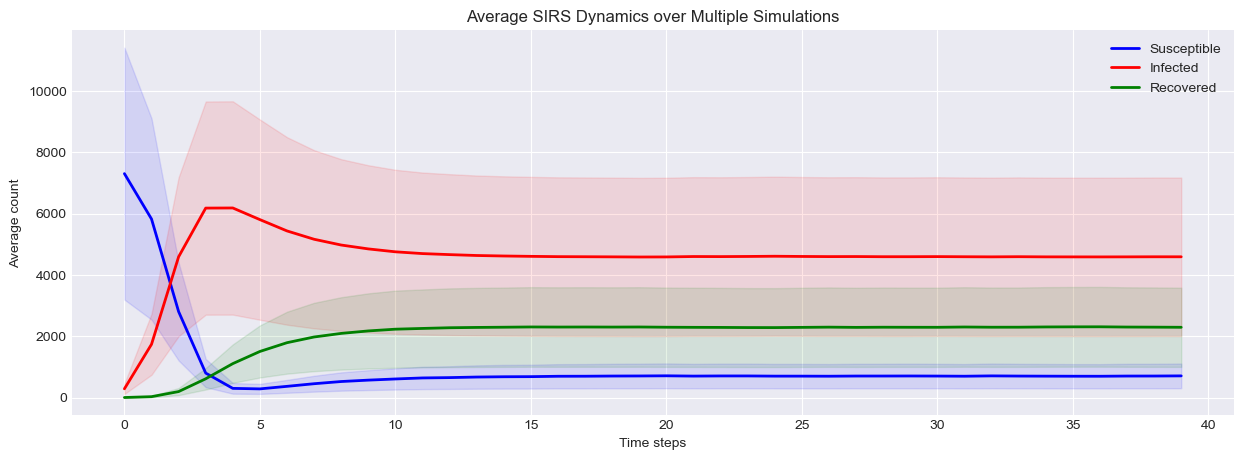

In [80]:
# Calculate global moving averages and standard deviations
global_moving_avg_S = np.mean(all_S, axis=0)
global_moving_avg_I = np.mean(all_I, axis=0)
global_moving_avg_R = np.mean(all_R, axis=0)
global_moving_std_S = np.std(all_S, axis=0)
global_moving_std_I = np.std(all_I, axis=0)
global_moving_std_R = np.std(all_R, axis=0)

window_size = 5
threshold = 0.05
consecutive_steps_for_equilibrium = 5

# Adjust the loop for checking equilibrium condition
for i in range(1, len(global_moving_avg_I)):
    epsilon = 1e-10
    if (np.abs(global_moving_avg_I[i] - global_moving_avg_I[i-1]) / (global_moving_avg_I[i-1] + epsilon) < threshold):
        consecutive_steps_below_threshold += 1
        if consecutive_steps_below_threshold >= consecutive_steps_for_equilibrium:
            equilibrium_step = i + window_size // 2  # Adjust for the window size effect
            break
    else:
        consecutive_steps_below_threshold = 0

# Check if an equilibrium step was found and print mean and std
if equilibrium_step is not None:
    print(f"Equilibrium reached at step {equilibrium_step + window_size}")
    eq_step_index = equilibrium_step - (window_size - 1)
    print(f"Mean and std at equilibrium (step {equilibrium_step + window_size}):")
else:
    print("Equilibrium state was not reached within the given time frame")
    eq_step_index = -1  # Use the last step's index
    print(f"Mean and std at the last step ({num_steps}):")

# Print global means and standard deviations at equilibrium or the last step
print(f"Mean S: {global_moving_avg_S[eq_step_index]:.2f}, Std S: {global_moving_std_S[eq_step_index]:.2f}")
print(f"Mean I: {global_moving_avg_I[eq_step_index]:.2f}, Std I: {global_moving_std_I[eq_step_index]:.2f}")
print(f"Mean R: {global_moving_avg_R[eq_step_index]:.2f}, Std R: {global_moving_std_R[eq_step_index]:.2f}")

# Plotting I, S, and R
plt.figure(figsize=(15, 5))

plt.fill_between(range(num_steps), global_moving_avg_S - global_moving_std_S, global_moving_avg_S + global_moving_std_S, color='blue', alpha=0.1)
plt.plot(range(num_steps), global_moving_avg_S, label='Susceptible', color='blue', linewidth=2)

plt.fill_between(range(num_steps), global_moving_avg_I - global_moving_std_I, global_moving_avg_I + global_moving_std_I, color='red', alpha=0.1)
plt.plot(range(num_steps), global_moving_avg_I, label='Infected', color='red', linewidth=2)

plt.fill_between(range(num_steps), global_moving_avg_R - global_moving_std_R, global_moving_avg_R + global_moving_std_R, color='green', alpha=0.1)
plt.plot(range(num_steps), global_moving_avg_R, label='Recovered', color='green', linewidth=2)

plt.xlabel('Time steps')
plt.ylabel('Average count')
plt.title('Average SIRS Dynamics over Multiple Simulations')
plt.legend()
plt.show()

### Heterogeneous Diffusion
1. **Modify Transition Probabilities:** Change the model to have heterogeneous transmission probabilities based on the number of infected neighbors.
2. **Simulation Adjustments:** Adjust the simulation code to incorporate these new rules and observe the impact on the epidemic spread.




### Graph Mining with R-Mat
1. **Integrate R-Mat:** Use the R-Mat algorithm for graph generation and simulate the epidemic on these graphs.
2. **Analysis:** Analyze how the structure generated by R-Mat affects the spread as compared to other models


### Real-World Data and Graph Generators
1. **Utilize Graph Generators:** Implement graph generators like Darwini or Datasynth to create graphs based on real-world data.
2. **Comparison:** Compare the simulation results across the different graph types, including real-world data-informed graphs.



### C++ Implementation with EpiFire
1. **C++ Simulation:** Write a basic C++ code to simulate the epidemic using the EpiFire library.
2. **Interpretation:** Compare the performance and results of the C++ simulation with the Python version.




### Fixed graph 
For this example, we'll use a *simple lattice network*, which is a type of fixed graph with a regular structure. 
* In a lattice network, each node is connected to its nearest neighbors in a grid-like pattern.
* It's a 2D lattice network. Each node will be connected to its four neighbors (up, down, left, right), except for nodes on the edges of the grid, which will have fewer neighbors (it's like a matrix).


In [216]:
# Simulation parameters
delta = 0.7  # Probability of S->I transition
gamma = 0.2 # Probability of I->R transition
beta = 0.4  # Probability of R->S transition
num_steps = 100  # Number of steps in each simulation
num_simulations = 15  # Number of simulations to run
infected_ratio = 0.005 # Initial fraction of infected individuals
boundary_condition = 'non-fixed'  # default value

In [2]:
# Define the colors: blue for Susceptible, red for Infected, green for Recovered
def colors_grid():
    cmap = plt.cm.colors.ListedColormap(['blue', 'yellow', 'green'])
    norm = plt.cm.colors.BoundaryNorm([-1, 0, 1, 2], cmap.N)
    return cmap, norm

In [218]:
# Function to plot the grid as separate squares with borders
def plot_grid(grid):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))

    cmap, norm = colors_grid()
    
    # Loop over the grid and plot each cell as a square with a border
    for (i, j), state in np.ndenumerate(grid):
        color = cmap(norm(state))
        square = plt.Rectangle((j-0.5, i-0.5), 1, 1, facecolor=color, edgecolor='white', linewidth=0)
        ax.add_patch(square)
    
    # Set the axis limits to show all squares
    ax.set_xlim(-0.5, grid.shape[1]-0.5)
    ax.set_ylim(-0.5, grid.shape[0]-0.5)
    
    # Hide the axis ticks and labels
    ax.axis('off')

    plt.show()

The user have 2 choices:
1. Plotting a **lattice network** (choice **1**)
2. Plotting a **matrix grid** (choice **2**)

Enter 1 for a 2D Lattice Network, or 2 for a matrix grid:  2


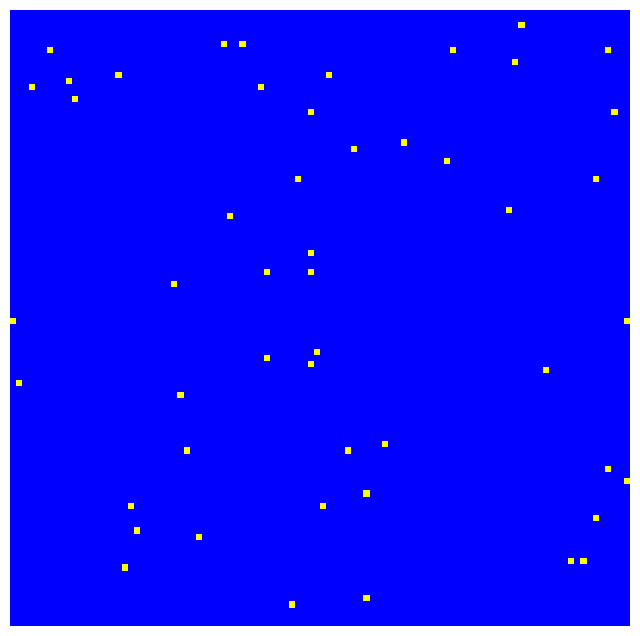

In [219]:
# Define dimensions of the lattice
width, height = 100,100

choice = input("Enter 1 for a 2D Lattice Network, or 2 for a matrix grid: ")

if choice == '1':
    # Create a 2D lattice graph
    G = nx.grid_2d_graph(width, height, periodic=False)
    
    # Convert node labels from 2D coordinates to integers
    G = nx.convert_node_labels_to_integers(G)
    
    # Create positions for each node for visualization
    pos = {node: (node % width, -(node // width)) for node in G.nodes()}

    nx.set_node_attributes(G, 'S', 'state')
        
    # Choose initial infected nodes
    initial_infecteds = np.random.choice(G.nodes(), size=int(G.number_of_nodes() * infected_ratio), replace=False)

    for i in initial_infecteds:
        G.nodes[i]['state'] = 'I'
    
    # Visualize the graph
    color_map = {'S': 'blue', 'I': 'red'}
    node_colors = [color_map[G.nodes[node]['state']] for node in G.nodes()]
    
    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_size=50, node_color=node_colors)
    plt.title('2D Lattice Network')
    plt.show()

elif choice == '2':
    # Initialize the grid: -1 for Susceptible, 0 for Infected, 1 for Recovered
    grid = np.full((height, width), -1)  # Start with all susceptible
    # Infect a random fraction of the grid
    num_infected = int(width * height * infected_ratio)
    infected_indices = np.random.choice(width * height, num_infected, replace=False)
    grid.flat[infected_indices] = 0  # Set infected

    # Plot the initialized grid
    plot_grid(grid)

else:
    print("Invalid choice. Please enter 1 or 2.")
    G = None

### SIRS Model Simulation on a Matrix Grid
In this section, we are adapting the SIRS (Susceptible-Infected-Recovered-Susceptible) epidemic model to simulate on a matrix grid. The matrix grid approach provides a simplified and computationally efficient representation of the network model where individuals (or nodes) and their states are represented as elements within a 2D array. This contrasts with a more complex graph-based approach that requires handling individual nodes and edges.
* We represent the states within a numpy array with the following values:
    * **-1:** Susceptible
    * **0:** Infected
    * **1:** Recovered
* The function *simulate_epidemic_step* iterates over each element in the array (each individual), checks the states of its neighbors, applies the SIRS transition rules, and returns the updated grid

In [4]:
@jit(nopython=True)
def simulate_epidemic_step(grid, delta, gamma, beta, boundary_condition, model):
    """
    Simulate one step of an epidemic model (SIR, SIS, or SIRS) on a matrix grid.

    Parameters:
    - grid: numpy array representing the state of each cell (-1: Susceptible, 0: Infected, 1: Recovered)
    - delta: Probability of S->I transition
    - gamma: Probability of I->R transition (for SIR and SIRS) or I->S transition (for SIS)
    - model: Type of model to simulate ('SIR', 'SIS', or 'SIRS')
    - beta: Probability of R->S transition (used in SIR and SIRS models)
    - boundary_condition: Type of boundary condition ('fixed' or 'non-fixed')

    Returns:
    - A new grid representing the next state.
    """
    width, height = grid.shape
    new_grid = np.empty_like(grid)
    for i in range(height):
        for j in range(width):
            state = grid[i, j]
            infected_neighbors = 0
            neighbor_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]
            for di, dj in neighbor_offsets:
                ni, nj = i + di, j + dj
                if boundary_condition != 'fixed':
                    ni, nj = ni % height, nj % width
                # Check bounds for fixed boundaries
                if 0 <= ni < height and 0 <= nj < width:
                    if grid[ni, nj] == 0:
                        infected_neighbors += 1
   
            # State transitions
            rand = np.random.random()  # Generate a random number once per cell for efficiency
            if state == -1 and infected_neighbors > 0 and rand < delta:
                new_grid[i, j] = 0  # S->I for SIR/SIRS/SIS
            elif state == 0 and rand < gamma:
                new_state = -1 if model == 'SIS' else 1  # I->R for SIR/SIRS, I->S for SIS
                new_grid[i, j] = new_state
            elif state == 1 and model == 'SIRS' and rand < beta:
                new_grid[i, j] = -1  # R->S for SIRS
            else:
                new_grid[i, j] = state
                
    return new_grid

### Comparison of the stochastic approach using Gillespie Algorithm and grid-based probabilistic models

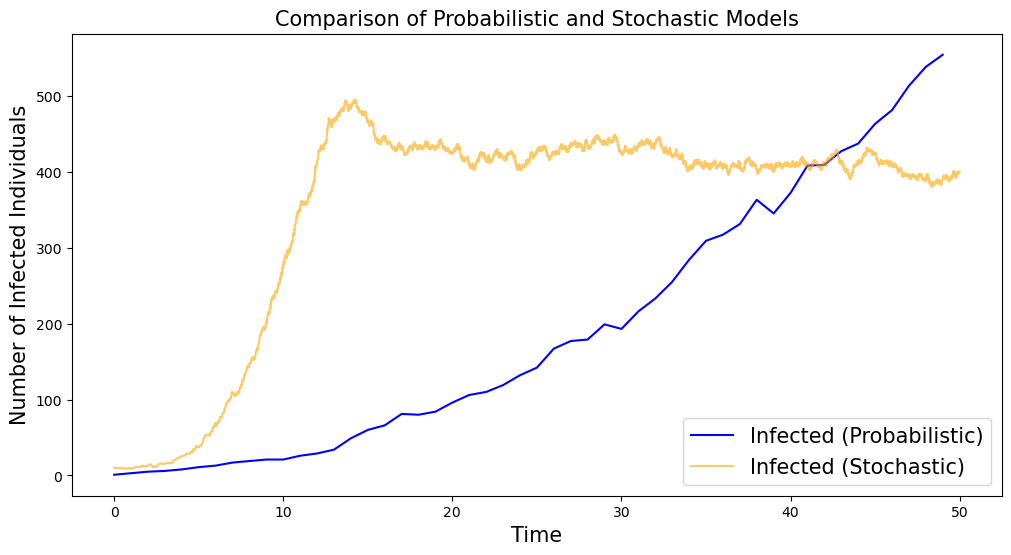

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Probabilistic Model Simulation
@jit(nopython=True)
def simulate_epidemic_step(grid, delta, gamma, beta, boundary_condition, model):
    width, height = grid.shape
    new_grid = np.empty_like(grid)
    for i in range(height):
        for j in range(width):
            state = grid[i, j]
            infected_neighbors = 0
            neighbor_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]
            for di, dj in neighbor_offsets:
                ni, nj = i + di, j + dj
                if boundary_condition != 'fixed':
                    ni, nj = ni % height, nj % width
                if 0 <= ni < height and 0 <= nj < width:
                    if grid[ni, nj] == 0:
                        infected_neighbors += 1

            rand = np.random.random()
            if state == -1 and infected_neighbors > 0 and rand < delta:
                new_grid[i, j] = 0
            elif state == 0 and rand < gamma:
                new_state = -1 if model == 'SIS' else 1
                new_grid[i, j] = new_state
            elif state == 1 and model == 'SIRS' and rand < beta:
                new_grid[i, j] = -1
            else:
                new_grid[i, j] = state
    return new_grid

def run_probabilistic_simulation(grid, steps, delta, gamma, beta, boundary_condition, model):
    infected_counts = []
    for _ in range(steps):
        grid = simulate_epidemic_step(grid, delta, gamma, beta, boundary_condition, model)
        infected_counts.append(np.sum(grid == 0))
    return infected_counts

# Stochastic Approach Simulation (Gillespie Algorithm)
def gillespie_sirs(S0, I0, R0, beta, gamma, delta, T):
    S, I, R = [S0], [I0], [R0]
    t = 0
    times = [0]

    while t < T:
        N = S[-1] + I[-1] + R[-1]
        rates = [
            beta * S[-1] * I[-1] / N,
            gamma * I[-1],
            delta * R[-1]
        ]
        rate_sum = sum(rates)

        if rate_sum == 0:
            break

        tau = np.random.exponential(1 / rate_sum)
        t += tau
        rand = np.random.random() * rate_sum

        if rand < rates[0]:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])
        elif rand < rates[0] + rates[1]:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)
        else:
            S.append(S[-1] + 1)
            I.append(I[-1])
            R.append(R[-1] - 1)

        times.append(t)

    return np.array(times), np.array(S), np.array(I), np.array(R)

# Parameters
S0, I0, R0 = 990, 10, 0
beta, gamma, delta = 0.7, 0.2, 0.3
T = 50
steps = 50
grid_size = 100

# Initial Grid for Probabilistic Simulation
grid = np.full((grid_size, grid_size), -1)
initial_infected = [(50, 50)]
for i, j in initial_infected:
    grid[i, j] = 0

# Run Simulations
infected_counts_prob = run_probabilistic_simulation(grid, steps, delta, gamma, beta, 'fixed', 'SIRS')
times_stoch, S_stoch, I_stoch, R_stoch = gillespie_sirs(S0, I0, R0, beta, gamma, delta, T)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(range(steps), infected_counts_prob, label='Infected (Probabilistic)', color='blue')
plt.plot(times_stoch, I_stoch, label='Infected (Stochastic)', color='orange', alpha=0.6)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Infected Individuals', fontsize=15)
plt.legend(fontsize=15)
plt.title('Comparison of Probabilistic and Stochastic Models', fontsize=15)
plt.savefig('Comparison_Probabilistic_Stochastic Models.png')
plt.show()

### Running multiple simulations on fixed graphs
After defining the key parameters (probabilities, initial conditions etc...), let's run the simulations multiple times to observe the variability in the outcomes. This will help us understand the potential range of epidemic sizes and durations due to stochastic effects.
* Let's animate the spreading of the infection

In [220]:
# Function to update the plot for each frame
def update(frame, G_sim, states_history, ax, num_steps):
    ax.clear()
    # Retrieve the states from history
    states = states_history[frame]
    colors = ['blue' if state == 'S' else 'yellow' if state == 'I' else 'green' for state in states]
    nx.draw(G_sim, pos, node_color=colors, with_labels=False, ax=ax)
    ax.set_title(f"Step: {frame}/{num_steps}")

In [223]:
def update_matrix(frame, grid_history, ax):
    ax.clear()  # Clear the axis to draw the new frame
    current_grid = grid_history[frame]  # Get the current grid state from history
    
    # Define the colors: blue for Susceptible, red for Infected, green for Recovered
    cmap = plt.cm.colors.ListedColormap(['blue', 'yellow', 'green'])
    norm = plt.cm.colors.BoundaryNorm([-1, 0, 1, 2], cmap.N)
    
    # Use imshow to plot the grid efficiently
    ax.imshow(current_grid, cmap=cmap, norm=norm, extent=(-0.5, current_grid.shape[1]-0.5, -0.5, current_grid.shape[0]-0.5))

    # Hide the axis ticks and labels
    ax.axis('off')
    ax.set_title(f"Step: {frame}/{len(grid_history)}")

In [224]:
# Prepare to collect simulation results
all_I = np.zeros((num_simulations, num_steps))
all_S = np.zeros((num_simulations, num_steps))
all_R = np.zeros((num_simulations, num_steps))

# Select 3 random simulations to plot
simulations_to_plot = random.sample(range(num_simulations), 1)

# Run multiple simulations
for simulation in range(num_simulations):
    if choice == '1':
        G_sim = G.copy() # Reset the graph
        states_history = [] # Store states for each step

    else:
        grid_copy = np.copy(grid) 
        grid_history = [] # Store states for each step
    
    # Run the simulation
    for step in range(num_steps):
        if choice == '1':
            states = [G_sim.nodes[node]['state'] for node in G_sim.nodes()]
            states_history.append(states)  # Append current states to history
            
            all_S[simulation, step] = states.count('S')
            all_I[simulation, step] = states.count('I')
            all_R[simulation, step] = states.count('R')

            simulate_SIRS_step(G_sim, delta, gamma, beta)

        else:
            grid_history.append(np.copy(grid_copy))  # Store the updated state

            # Store the counts of S, I, R
            all_S[simulation, step] = np.count_nonzero(grid_copy == -1)
            all_I[simulation, step] = np.count_nonzero(grid_copy == 0)
            all_R[simulation, step] = np.count_nonzero(grid_copy == 1)

            grid_copy = simulate_epidemic_step(grid_copy, delta, gamma, beta, 'non-fixed', 'SIRS')  # Update grid state

    # Append the last state
    if choice == '1':
        states_history.append(states) 
    else:
        grid_history.append(np.copy(grid_copy))

    # Plot the network for selected simulations
    if simulation in simulations_to_plot:
        fig, ax = plt.subplots(figsize=(8, 8))
        if choice == '1':
            # Now create the animation for the current simulation
            ani = FuncAnimation(fig, update, frames=num_steps, fargs=(G_sim, states_history, ax, num_steps), interval=100, repeat=False)
            title = f'sirs_simulation_{simulation + 1}.mp4'
            
        else:
            ani = FuncAnimation(fig, update_matrix, frames=len(grid_history), fargs=(grid_history, ax), interval=50, repeat=False)
            title = f'new_sirs_simulation_grid_{simulation + 1}.mp4'
            
        # Display the animation
        plt.close(fig)  # Close the plot to prevent it from showing statically
        HTML(ani.to_jshtml())  # This will embed the animation in the notebook

        # Save the animation as a video file
        ani.save(title) 

Let's try to process the result next to get the mean and standard deviation for S, I, and R and find the equilibrium state.
* To ensure that the system has indeed reached an equilibrium state, we can modify the code to check for a consecutive number of time steps where the percentage change in the average number of infected, recovered and suspected individuals is below the threshold, rather than just a single time step.
* The moving average is used to smooth out short-term fluctuations and highlight longer-term trends in data.
* By smoothing out these fluctuations, we can more accurately determine when the system reaches an equilibrium state, which is characterized by the minimal change in the number of susceptible, infected, and recovered individuals over time.


The equilibrium state we are determining using global moving averages is a representation of the "average" behavior of the system across all simulations. While it may not reflect the precise dynamics of any single simulation at any given time, it gives a more general and statistically robust picture of the system's behavior.

In stochastic simulations like the SIRS model, individual runs can vary significantly due to the random nature of the transitions between states. By considering the moving average across multiple simulations:

* **You reduce the noise:** The moving average smooths out the randomness and fluctuations that might be present in individual simulations.

* **You get a better estimate of the expected behavior:** When you average across many simulations, you are essentially estimating the expected value of the system's state at any given time step, which can be a more reliable indicator of the system's behavior than any single run.

* **You assess the stability of the system:** The equilibrium detected in this way is not the *static equilibrium* where no more changes occur but rather a *dynamic equilibrium* where the system's state changes around a relatively stable average value.

However, there are a few problems we should keep in mind:

* **The chosen *threshold* and *window size*:** These parameters significantly influence the detection of equilibrium. If the *threshold* is too strict, we might not detect equilibrium even if the system is relatively stable and the *window size* affects how much the data is smoothed.

In summary, the equilibrium we are determining is a measure of when the system's behavior becomes stable and predictable on average, rather than an indication of when each simulation individually reaches a static state.

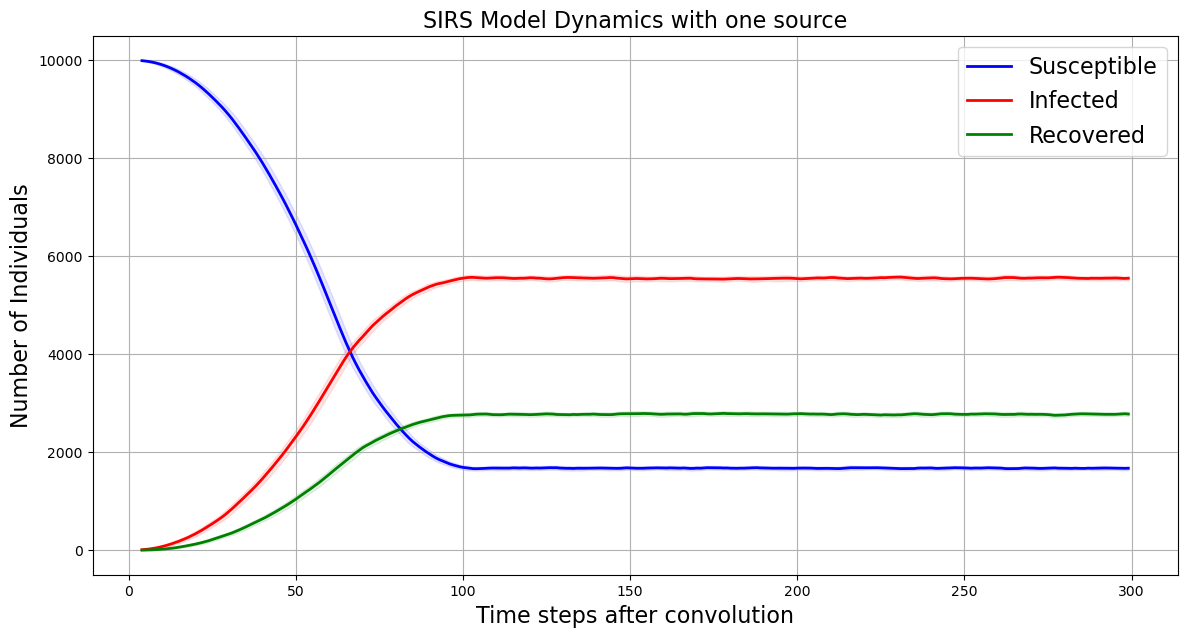

In [49]:
window_size = 5
threshold = 0.01
consecutive_steps_for_equilibrium = 10

# Calculate global moving averages and standard deviations across all simulations
global_moving_avg_S = np.zeros(num_steps - window_size + 1)
global_moving_avg_I = np.zeros(num_steps - window_size + 1)
global_moving_avg_R = np.zeros(num_steps - window_size + 1)
global_moving_std_S = np.zeros(num_steps - window_size + 1)
global_moving_std_I = np.zeros(num_steps - window_size + 1)
global_moving_std_R = np.zeros(num_steps - window_size + 1)

for step in range(window_size - 1, num_steps):
    # Slice to get the windowed data across all simulations for this time step
    windowed_S = all_S[:, step-window_size+1:step+1]
    windowed_I = all_I[:, step-window_size+1:step+1]
    windowed_R = all_R[:, step-window_size+1:step+1]

    # Calculate the means and standard deviations for the window
    global_moving_avg_S[step-window_size+1] = np.mean(windowed_S)
    global_moving_avg_I[step-window_size+1] = np.mean(windowed_I)
    global_moving_avg_R[step-window_size+1] = np.mean(windowed_R)
    global_moving_std_S[step-window_size+1] = np.std(windowed_S)
    global_moving_std_I[step-window_size+1] = np.std(windowed_I)
    global_moving_std_R[step-window_size+1] = np.std(windowed_R)

# Checking equilibrium condition
for i in range(1, len(global_moving_avg_I)):
    epsilon = 1e-10
    if (np.abs(global_moving_avg_I[i] - global_moving_avg_I[i-1]) / (global_moving_avg_I[i-1] + epsilon) < threshold):
        consecutive_steps_below_threshold += 1
        if consecutive_steps_below_threshold >= consecutive_steps_for_equilibrium:
            equilibrium_step = i + window_size // 2  # Adjust for the window size effect
            break
    else:
        consecutive_steps_below_threshold = 0

# Check if an equilibrium step was found and print mean and std
if equilibrium_step is not None:
    #print(f"Equilibrium reached at step {equilibrium_step + window_size}")
    eq_step_index = equilibrium_step - (window_size - 1)
    #print(f"Mean and std at equilibrium (step {equilibrium_step + window_size}):")
else:
    print("Equilibrium state was not reached within the given time frame")
    eq_step_index = -1  # Use the last step's index
    #print(f"Mean and std at the last step ({num_steps}):")

# Print global means and standard deviations at equilibrium or the last step
#print(f"Mean S: {global_moving_avg_S[eq_step_index]:.2f}, Std S: {global_moving_std_S[eq_step_index]:.2f}")
#print(f"Mean I: {global_moving_avg_I[eq_step_index]:.2f}, Std I: {global_moving_std_I[eq_step_index]:.2f}")
#print(f"Mean R: {global_moving_avg_R[eq_step_index]:.2f}, Std R: {global_moving_std_R[eq_step_index]:.2f}")

# Plotting with shaded areas for standard deviation
time_steps = np.arange(window_size - 1, num_steps)

plt.figure(figsize=(14, 7))

plt.fill_between(time_steps, global_moving_avg_S - global_moving_std_S, global_moving_avg_S + global_moving_std_S, color='blue', alpha=0.1)
plt.fill_between(time_steps, global_moving_avg_I - global_moving_std_I, global_moving_avg_I + global_moving_std_I, color='red', alpha=0.1)
plt.fill_between(time_steps, global_moving_avg_R - global_moving_std_R, global_moving_avg_R + global_moving_std_R, color='green', alpha=0.1)

plt.plot(time_steps, global_moving_avg_S, label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, global_moving_avg_I, label='Infected', color='red', linewidth=2)
plt.plot(time_steps, global_moving_avg_R, label='Recovered', color='green', linewidth=2)

plt.xlabel('Time steps after convolution', fontsize=16)
plt.ylabel('Number of Individuals', fontsize=16)
plt.title('SIRS Model Dynamics with one source', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.savefig('one_source')
plt.show()

### Analysis Epidemic Dynamics Across Different (γ,β) Configurations On a Grid Network
We aim in this analysis to understand the dynamics of an SIRS epidemic model across various simulations. Each simulation is characterized by a pair of parameters: γ (the recovery rate) and β (the rate at which recovered individuals return to a susceptible state). By keeping the infection rate constant, we observe the changes in the infected population over time solely as functions of γ and β
* Each (γ,β) configuration will have its dedicated plot and data set for clarity and ease of comparison.

In [2]:
number_of_workers = os.cpu_count() // 2
print(number_of_workers)
with Pool(number_of_workers) as pool:  # Use 7 of my 8 logical processors
    results = pool.map(run_simulation, gamma_beta_pairs)

4


In [9]:
@jit(nopython=True)
def run_simulation(num_steps, grid, delta, gamma, beta):
    infected_counts = np.zeros(num_steps)
    for step in range(num_steps):
        infected_counts[step] = np.count_nonzero(grid == 0)
        grid = simulate_epidemic_step(grid, delta, gamma, beta, 'SIRS')
    return infected_counts

In [11]:
gamma_beta_pairs = [(gamma, beta) for gamma in np.arange(0, 1.1, 0.1) 
                                   for beta in np.arange(0, 1.1, 0.1)]

# Run simulations and plot results
for gamma, beta in gamma_beta_pairs:
    simulation_results = np.zeros((num_simulations, num_steps))
    for simulation in range(num_simulations):
        grid_copy = np.copy(grid)  # Reset grid for each simulation
        simulation_results[simulation] = run_simulation(num_steps, grid_copy, delta, gamma, beta)

    # Plotting individual simulation lines
    plt.figure(figsize=(10, 5))
    for sim in range(simulation_results.shape[0]):
        plt.plot(simulation_results[sim, :], label=f'Simulation {sim+1}')
    
    plt.title(f'Simulation Series for γ={gamma:.1f}, β={beta:.1f}')
    plt.xlabel('Step')
    plt.ylabel('Infected Individuals')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.savefig(f'C:\\Users\\ubci\\OneDrive\\Bureau\\ProjetDeBachelor\\Simulation_series_Gamma_Beta\\simulation_series_gamma{gamma:.1f}_beta{beta:.1f}.png', bbox_inches='tight')
    plt.close()

    # Data Storage
    df = pd.DataFrame(simulation_results)
    df.to_csv(f'C:\\Users\\ubci\\OneDrive\\Bureau\\ProjetDeBachelor\\Simulation_data_Gamma_Beta\\simulation_data_gamma{gamma:.1f}_beta{beta:.1f}.csv', index=False)

In this section, we embark on a comprehensive analysis of the SIRS model across a spectrum of recovery rates (γ) and reinfection rates (β). Our simulations, encapsulated within a multi-parametric study, aim to discern patterns in the spread of infection over a predefined grid population. The essence of this analysis is to comprehend how these rates affect the state of the system, categorized into distinct behavioral regimes.

We have generated a suite of simulations for each pair of (γ,β), holding the infection rate (δ) constant. This approach allows us to observe the system's behavior solely as a function of recovery and reinfection dynamics. The outcomes of these simulations are crucial in understanding the conditions under which an infection may become endemic, be eradicated, or exhibit cyclical patterns.

To achieve this, we will proceed through the following steps:
* **Load and Aggregate Data:** For each (γ,β) pair, we will load the saved simulation data and compute the average infection level over time across all corresponding simulations.
* **Categorization:** Based on predetermined thresholds, we will categorize the epidemic outcome into three distinct types:
    * *All nodes are infected:* A high proportion of the grid becomes infected at some point in the simulation, indicating the potential for endemic infection.
    * *Infection ends:* The infection dies out before spreading significantly, suggesting conditions favorable for the eradication of the disease.
    * *Oscillation:* The number of infected individuals fluctuates without stabilizing, which could indicate complex dynamics such as seasonal effects or incomplete immunity.
* **Visualization:** We will create a phase diagram mapping each (γ,β) pair to its categorized behavior, color-coded for clarity. This visualization will provide a bird's-eye view of our model's dynamics under varying conditions.

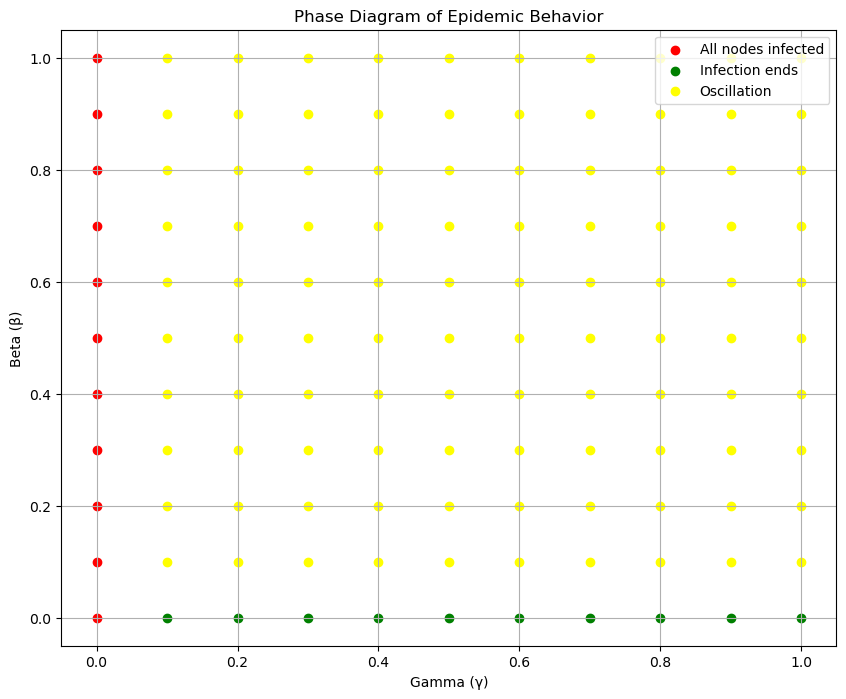

In [12]:
# Define the directory where the simulation data is stored
data_directory = "C:\\Users\\ubci\\OneDrive\\Bureau\\ProjetDeBachelor\\Simulation_data_Gamma_Beta"

total_nodes = width * height

# Prepare a list for the categorization of each pair
categorized_results = []

# Threshold for deciding categories
threshold = 0.80 * num_simulations  # 80% of all simulations are taken in the account (we allow 3 of 15)

# Iterate over all the (γ, β) pairs
for filename in os.listdir(data_directory):
    filepath = os.path.join(data_directory, filename)
    df = pd.read_csv(filepath)

    simulation_col = []
    
    for array_sim in np.asarray(df) :
        # Take the last element of each simulation array
        simulation_col.append(array_sim[-1])
        
    # Determine categories for each simulation and classify based on the majority condition
    if simulation_col.count(total_nodes) >= threshold:
        category = 'All nodes infected'
    elif simulation_col.count(0.0) >= threshold:
        category = 'Infection ends'
    else:
        category = 'Oscillation'
        
    # Extract γ, β from filename (assuming naming convention used earlier)
    gamma_beta = filename.replace('simulation_data_gamma', '').replace('beta', '').replace('.csv', '')
    gamma, beta = map(float, gamma_beta.split('_'))
        
    categorized_results.append((gamma, beta, category))

# Convert to DataFrame for easier analysis
categorized_df = pd.DataFrame(categorized_results, columns=['gamma', 'beta', 'category'])

# Plotting the categorized results
colors = {'All nodes infected': 'red', 'Infection ends': 'green', 'Oscillation': 'yellow'}

plt.figure(figsize=(10, 8))
for category, color in colors.items():
    subset = categorized_df[categorized_df['category'] == category]
    plt.scatter(subset['gamma'], subset['beta'], color=color, label=category)

plt.xlabel('Gamma (γ)')
plt.ylabel('Beta (β)')
plt.title('Phase Diagram of Epidemic Behavior')
plt.legend()
plt.grid(True)
plt.show()

### Interactive SIRS Model Simulation

This interactive simulation allows you to set the initial number of infected nodes and their locations on a 100x100 grid. You can start the simulation and observe the SIRS process in action. You can stop the simulation at any point by pressing the 'Stop' button.

Use the sliders to choose the initial number of infected nodes and their positions. Then, press 'Start' to begin the simulation and 'Stop' to end it. The simulation will run step by step, updating the grid to show the progression of the infection.

In [226]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from tkinter import simpledialog, messagebox

In [227]:
width, height = 100, 100

In [228]:
def select_boundary_condition(root):
    """
    Asks the user to select a boundary condition through a simple dialog and hides the main window during the selection.

    Parameters:
    - root: The main Tkinter window.

    Returns:
    - A string representing the chosen boundary condition ('fixed' or 'non_fixed').
    """
    root.withdraw()  # Hide the main window
    options = ["Fixed Boundaries", "Non Fixed Boundaries"]
    choice = simpledialog.askstring("Boundary Condition Selection",
                                    "Select Boundary Condition:\n1. Fixed Boundaries\n2. Non Fixed Boundaries",
                                    parent=root)  # Ensure the dialog is modal to the root window

    # Process the user's choice
    if choice is not None:  # Check if the user didn't just close the dialog
        choice = choice.lower()
        if "1" in choice or "fixed" in choice:
            root.deiconify()  # Show the main window again
            return "fixed"
        elif "2" in choice or "non" in choice:
            root.deiconify()  # Show the main window again
            return "non_fixed"
    
    # If the choice is None (dialog closed) or an invalid selection, show an error and exit
    messagebox.showerror("Invalid Selection", "Please restart and select a valid option.", parent=root)
    root.destroy()
    exit()

In [229]:
def select_model(root):
    """
    Asks the user to select an epidemic model (SIR, SIS, or SIRS) through a simple dialog and hides the main window during the selection.

    Parameters:
    - root: The main Tkinter window.

    Returns:
    - A string representing the chosen model ('SIR', 'SIS', or 'SIRS').
    """
    root.withdraw()  # Hide the main window temporarily
    model = simpledialog.askstring("Model Selection",
                                   "Select Epidemic Model:\n1. SIR\n2. SIS\n3. SIRS",
                                   parent=root)

    # Process the user's choice
    if model is not None:  # Check if the user didn't just close the dialog
        model = model.lower()
        if "1" in model or "sir" in model:
            root.deiconify()  # Show the main window again
            return "SIR"
        elif "2" in model or "sis" in model:
            root.deiconify()  # Show the main window again
            return "SIS"
        elif "3" in model or "sirs" in model:
            root.deiconify()  # Show the main window again
            return "SIRS"

    # If the choice is None (dialog closed) or an invalid selection
    messagebox.showerror("Invalid Selection", "Please restart and select a valid option.", parent=root)
    root.destroy()
    exit()

In [230]:
def expected_distance(beta, t, k=1):
    """
    Calculate the expected distance of infection spread on a grid-based model.

    Parameters:
    beta (float): Probability of infection transmission between neighbors.
    t (int): Number of time steps.
    k (int): Average number of neighbors in the considered direction (default is 1 for one direction).

    Returns:
    float: Expected distance of infection spread.
    """
    d = t * beta
    return d

Real infection source node set at: (43, 55)


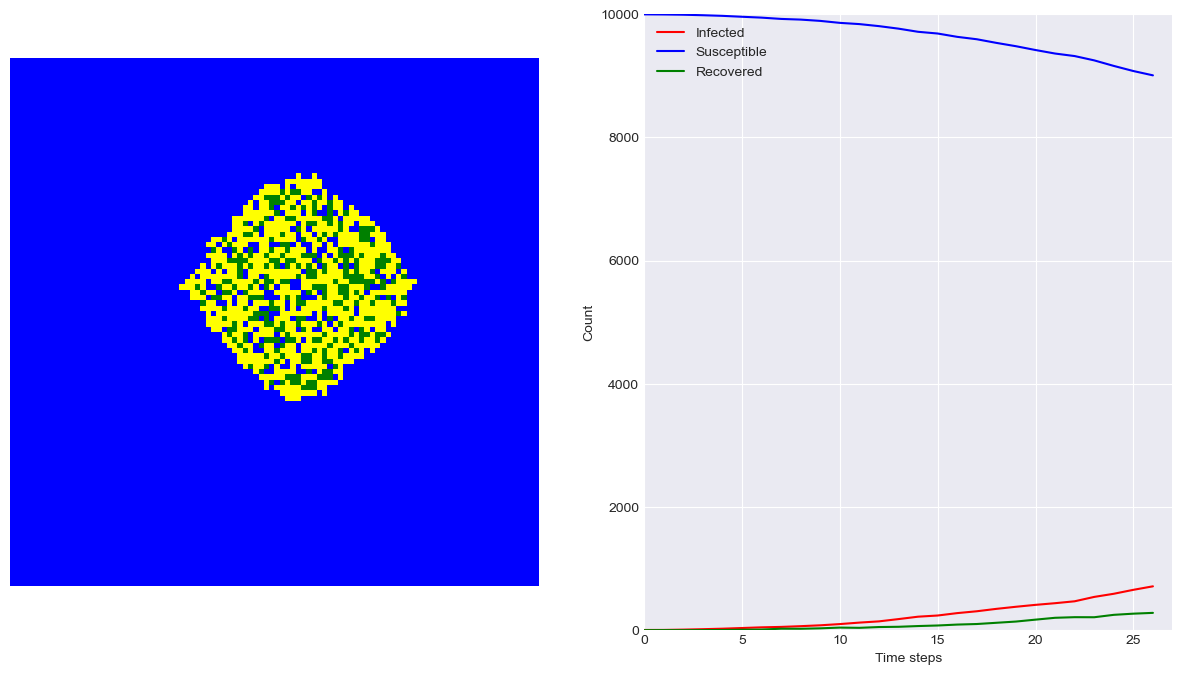

In [231]:
delta, gamma, beta = 0.7, 0.2, 0.4

cmap, norm = colors_grid()

window_size = 50  # Check the last 50 steps for equilibrium
threshold = 60    # Define the maximum allowed standard deviation
equilibrium_reached = False
grid = np.full((width, height), -1)  
running = False
current_step = 0
infected_counts, susceptible_counts, recovered_counts = [], [], []
tracked_node = None
distance = 0
actual_speeds = []
expected_speeds = []

# Setup the Tkinter window
root = tk.Tk()
root.title('SIRS Simulation Game')
boundary_condition = select_boundary_condition(root)
model = select_model(root)

# Function to update the equilibrium message
def display_equilibrium_message():
    equilibrium_label.config(text=f"Equilibrium state reached at step {current_step-40}!")

# Function to check for equilibrium state
def check_for_equilibrium(infected_counts):
    if len(infected_counts) >= window_size:
        recent_counts = infected_counts[-window_size:]
        std_deviation = np.std(recent_counts)
        
        if std_deviation < threshold:
            return True # Equilibrium state detected
    return False

# Function to update the grid plot and infection curve
def update_plot():
    global current_step, infected_counts, susceptible_counts, recovered_counts, actual_speeds, expected_speeds

    ax_grid.clear()
    ax_infected.clear()
    ax_grid.imshow(grid, cmap=cmap, norm=norm, aspect='equal')
    ax_grid.axis('off')

    ax_infected.plot(infected_counts, 'r-', label='Infected')
    ax_infected.plot(susceptible_counts, 'b-', label='Susceptible')
    ax_infected.plot(recovered_counts, 'g-', label='Recovered')
    ax_infected.set_xlim(0, max(1, current_step))
    ax_infected.set_ylim(0, width*height)
    ax_infected.set_xlabel('Time steps')
    ax_infected.set_ylabel('Count')
    ax_infected.legend()
    ax_infected.grid(True)

    step_label.config(text=f"Step: {current_step}")  # Update the step label here
    if actual_speeds:
        actual_speed_label.config(text=f"Actual Speed: {actual_speeds[-1]:.4f} nodes/step")
        expected_speed_label.config(text=f"Expected Speed: {expected_speeds[-1]:.4f} nodes/step")

    canvas.draw()

# Simulation step function
def simulation_step():
    global running, grid, current_step, infected_counts, susceptible_counts, recovered_counts, equilibrium_reached, boundary_condition, model, tracked_node, distance, actual_speeds, expected_speeds
    if running:
        current_step += 1  # Increment the step counter
        grid = simulate_epidemic_step(grid, delta_slider.get(), gamma_slider.get(), beta_slider.get(), boundary_condition, model)

        infected_counts.append(np.count_nonzero(grid == 0))
        susceptible_counts.append(np.count_nonzero(grid == -1))
        recovered_counts.append(np.count_nonzero(grid == 1))

        # Track the leftmost node
        if tracked_node:
            i, j = tracked_node
            if j > 0 and grid[i, j-1] == 0:  # Check if the left neighbor is infected
                tracked_node = (i, j-1)
                distance += 1  # Increment the distance

        # Calculate speeds
        actual_speed = distance / current_step if current_step > 0 else 0
        expected_speed = expected_distance(delta_slider.get(), current_step) / current_step if current_step > 0 else 0
        actual_speeds.append(actual_speed)
        expected_speeds.append(expected_speed)

        # Check for equilibrium state after updating counts 
        if not equilibrium_reached and check_for_equilibrium(infected_counts):
            # Stop the simulation
            stop_simulation()
            messagebox.showinfo(
                    "Equilibrium State",
                    f"Equilibrium reached!\nInfected: {infected_counts[-1]}"
                    f"\nSusceptible: {susceptible_counts[-1]}"
                    f"\nRecovered: {recovered_counts[-1]}"
                )
            equilibrium_reached = True
            display_equilibrium_message()
            
            
        update_plot()  # Update plots

        # Continue the simulation
        root.after(1, simulation_step)

def start_simulation():
    global running
    running = True
    status_label.config(text="Running")
    simulation_step()

def stop_simulation():
    global running
    status_label.config(text="Stopped")
    running = False

def reset_simulation():
    global running, current_step, grid, infected_counts, susceptible_counts, recovered_counts, equilibrium_reached, boundary_condition, model, tracked_node, distance, actual_speeds, expected_speeds
    running = False
    current_step = 0
    grid = np.full((width, height), -1)
    infected_counts, susceptible_counts, recovered_counts = [], [], []
    actual_speeds, expected_speeds = [], []
    tracked_node = None
    distance = 0
    status_label.config(text="Ready")
    equilibrium_label.config(text="")
    actual_speed_label.config(text="")
    expected_speed_label.config(text="")
    equilibrium_reached = False
    update_plot()
    boundary_condition = select_boundary_condition(root) # select boundary condition again
    model = select_model(root) # select model again

# Callback function for clicking on the grid
def on_click(event):
    global tracked_node
    if event.xdata is not None and event.ydata is not None:
        i, j = int(event.ydata), int(event.xdata)
        grid[i, j] = 0
        tracked_node = (i, j)
        print(f"Real infection source node set at: ({i}, {j})")
        update_plot()

# Slider update function
def update_labels(value):
    delta_label.config(text=f"Delta: {delta_slider.get():.2f}")
    gamma_label.config(text=f"Gamma: {gamma_slider.get():.2f}")
    beta_label.config(text=f"Beta: {beta_slider.get():.2f}")

# Set up the controls frame with sliders and buttons
controls_frame = ttk.Frame(root)
controls_frame.pack(side='top', fill='x', expand=True)

# sliders 
delta_slider = ttk.Scale(controls_frame, from_=0, to=1, orient='horizontal', value=delta, command=update_labels)
gamma_slider = ttk.Scale(controls_frame, from_=0, to=1, orient='horizontal', value=gamma, command=update_labels)
beta_slider = ttk.Scale(controls_frame, from_=0, to=1, orient='horizontal', value=beta, command=update_labels)
# labels
delta_label = ttk.Label(controls_frame, text=f"Delta: {delta:.2f}")
gamma_label = ttk.Label(controls_frame, text=f"Gamma: {gamma:.2f}")
beta_label = ttk.Label(controls_frame, text=f"Beta: {beta:.2f}")
step_label = ttk.Label(controls_frame, text="Step: 0")
# buttons
start_button = ttk.Button(controls_frame, text='Start', command=start_simulation)
stop_button = ttk.Button(controls_frame, text='Stop', command=stop_simulation)
reset_button = ttk.Button(controls_frame, text='Reset', command=reset_simulation)
# Pack the sliders, the labels, and the buttons
for widget in [delta_slider, gamma_slider, beta_slider, delta_label, gamma_label, beta_label, step_label, start_button, stop_button, reset_button]:
    widget.pack(side='left', padx=10)

# Set up the matplotlib figure and axes
fig, (ax_grid, ax_infected) = plt.subplots(1, 2, figsize=(15, 8))  # Two subplots: one for the grid, one for the infection curve

# Setup the canvas and toolbar
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.mpl_connect('button_press_event', on_click)  # Connect the on_click function
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack(side='bottom', fill='both', expand=True)

# status label
status_label = ttk.Label(root, text="Ready", foreground="blue")
status_label.pack(side='top', pady=10)

# equilibrium label
equilibrium_label = ttk.Label(root, text="", foreground="red")
equilibrium_label.pack(side='top', pady=10)

# Speed labels
actual_speed_label = ttk.Label(root, text="Actual Speed: 0.0000 nodes/step", foreground="green")
actual_speed_label.pack(side='top', pady=10)

expected_speed_label = ttk.Label(root, text="Expected Speed: 0.0000 nodes/step", foreground="orange")
expected_speed_label.pack(side='top', pady=10)

# Initialize the grid plot
ax_grid.imshow(grid, cmap=cmap, norm=norm, aspect='equal')

# Initialize the infection plot
infected_counts = [0] * current_step
(line,) = ax_infected.plot(range(current_step), infected_counts, 'r-')

# Add the navigation toolbar
toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()

# Initial plot update
update_plot()

# Start the Tkinter main loop
root.mainloop()

In [232]:
import heapq

In [233]:
print(boundary_condition)
print(model)

non_fixed
SIRS


In [306]:
@jit(nopython=True)
def get_all_neighbors(width, height, boundary_condition):
    """Pre-calculate the neighbors for each node in the grid based on the boundary condition."""
    all_neighbors_flat = np.full(width * height * 4, -1, dtype=np.int32)

    for i in range(height):
        for j in range(width):
            idx = (i * width + j) * 4  # Start index for current node
            if boundary_condition == 'fixed':
                if i > 0: all_neighbors_flat[idx] = (i - 1) * width + j  # Up
                if j > 0: all_neighbors_flat[idx + 1] = i * width + (j - 1)  # Left
                if i < height - 1: all_neighbors_flat[idx + 2] = (i + 1) * width + j  # Down
                if j < width - 1: all_neighbors_flat[idx + 3] = i * width + (j + 1)  # Right
            else:
                all_neighbors_flat[idx] = ((i - 1) % height) * width + j  # Up
                all_neighbors_flat[idx + 1] = i * width + (j - 1) % width  # Left
                all_neighbors_flat[idx + 2] = ((i + 1) % height) * width + j  # Down
                all_neighbors_flat[idx + 3] = i * width + (j + 1) % width  # Right
    
    return all_neighbors_flat

In [307]:
@jit(nopython=True)
def get_all_neighbors_including_center(i, j, width, height, boundary_condition):
    """Get all neighbors including the center and diagonals, taking into account the boundary condition."""
    neighbors = []  # This will be a list to collect neighbors
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            # Calculate the neighbor's index considering the boundary condition
            if boundary_condition == 'fixed':
                ni, nj = i + di, j + dj
                if 0 <= ni < height and 0 <= nj < width:
                    neighbors.append((ni, nj))
            else:  # 'wraparound' boundary condition
                ni, nj = (i + di) % height, (j + dj) % width
                neighbors.append((ni, nj))
    return np.array(neighbors, dtype=np.int32)

In [308]:
@jit(nopython=True)
def infection_nodes(grid):
    width, height = grid.shape
    # Create an empty array to store the infection status
    infected_status = np.zeros((height, width), dtype=np.int32)
    
    # Iterate over each cell in the grid
    for i in range(height):
        for j in range(width):
            # Check current node infection status
            if grid[i, j] == 0:
                infected_status[i, j] = 1  # Node is currently infected
                continue
            
            # Check if any neighbor is infected for susceptible nodes
            if grid[i, j] == -1:
                if i > 0 and grid[i-1, j] == 0:
                    infected_status[i, j] = 1  # North neighbor
                elif i < height - 1 and grid[i+1, j] == 0:
                    infected_status[i, j] = 1  # South neighbor
                elif j > 0 and grid[i, j-1] == 0:
                    infected_status[i, j] = 1  # West neighbor
                elif j < width - 1 and grid[i, j+1] == 0:
                    infected_status[i, j] = 1  # East neighbor
    
    # Return the indices where infected_status is 1 (either currently infected or was infected)
    return np.argwhere(infected_status == 1)

## Finding the boundary nodes

- Let's break down the function **find_infection_boundary** into its steps to understand how it works to identify the external infection boundary nodes:

1. ***Identify All Potential Boundary Nodes***
- Here, the code iterates over each cell in the grid. For every infected cell (value 0), it checks whether it has at least one susceptible neighbor (value -1). If it does, the cell is marked as a potential boundary node. This step is important to initially mark all nodes that are adjacent to susceptible nodes and could potentially be on the boundary of the infection.

2. ***Flood Fill from Grid Edges***
- In this step, a flood fill algorithm is applied starting from the edges of the grid to identify all susceptible nodes that are reachable from the edge. This simulates "filling" all connected susceptible nodes, starting from the outer boundary of the grid. The mask is updated to represent nodes that are part of this reachable area. The flood fill doesn't enter infected nodes, effectively marking the boundary between the infected region and the edge-reachable susceptible region.

3. ***Identify Internal Potential Boundary Nodes***
- After flood-filling the reachable susceptible nodes from the edges, the code goes through all potential boundary nodes identified in Step 1. If a potential boundary node is adjacent to a reachable susceptible node (marked in the mask from Step 2), it's an internal potential boundary. In other words, this node is on the inside edge of the infection area adjacent to areas that are not enclosed by the infection.

4. ***Isolate Actual Boundary Nodes***
- In the final step, the actual boundary nodes are identified by performing a logical AND operation between potential_boundary and in_potential_boundary. This combines the conditions of being a potential boundary node (from Step 1) and being next to an edge-reachable susceptible area (from Step 3). The result is an array marking the actual boundary nodes, which are infected nodes that are adjacent to the external area of susceptibility.

* ***Summary of Process:***
- The process effectively finds the boundary of the infection by differentiating between the outer edge, where infected nodes meet the open grid, and the inner edge, where infected nodes are adjacent to the area that is not enclosed by the infection. The mask created by the flood fill is critical, as it helps to identify which of the potential boundary nodes are actually on the external boundary of the infection.

* By understanding this process, you can now analyze how the infection is spreading and where it is contained within certain boundaries, which is vital for many epidemiological models and simulations.

In [237]:
from matplotlib.colors import ListedColormap, BoundaryNorm

In [238]:
def flood_fill(grid, mask, start_i, start_j, target_val, fill_value):
    stack = {(start_i, start_j)}  # Using a set to avoid duplicate positions
    while stack:
        x, y = stack.pop()
        if mask[x, y] != fill_value and grid[x, y] == target_val:
            mask[x, y] = fill_value
            base_idx = (x * width + y) * 4
            for k in range(4):  # Changed loop variable to k to avoid confusion with i, j
                neighbor_idx = neighbors_map[base_idx + k]
                if neighbor_idx != -1:  # Valid neighbor index
                    nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
                    if mask[nx, ny] != fill_value:
                        stack.add((nx, ny))

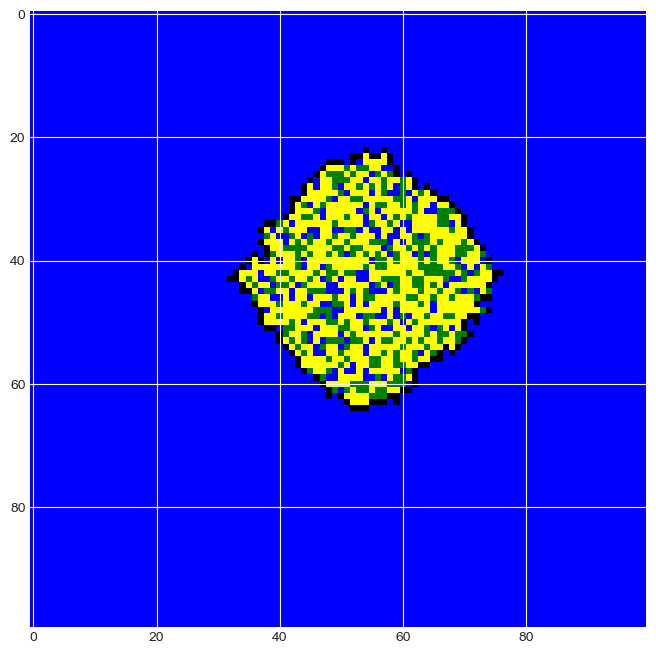

In [239]:
def find_external_boundary_grid(grid):
    height, width = grid.shape
    infected_val = 0  # Infected nodes
    susceptible_val = -1  # Susceptible nodes

    # Step 1: Identify All Potential Boundary Nodes
    potential_boundary = np.zeros_like(grid, dtype=bool)
    for i in range(height):
        for j in range(width):
            if grid[i, j] == infected_val:
                base_idx = (i * width + j) * 4
                for k in range(4):
                    neighbor_idx = neighbors_map[base_idx + k]
                    if neighbor_idx != -1:
                        nx, ny = divmod(neighbor_idx, width)
                        if grid[nx, ny] == susceptible_val:
                            potential_boundary[i, j] = True
                            break

    # Step 2: Flood Fill from Grid Edges
    mask = np.zeros_like(grid, dtype=bool)
    edge_indices = np.hstack((np.arange(0, width), np.arange(grid.size - width, grid.size)))
    for edge_idx in edge_indices:
        i, j = divmod(edge_idx, width)
        if grid[i, j] == susceptible_val and not mask[i, j]:
            flood_fill(grid, mask, i, j, susceptible_val, True)

    # Step 3: Identify Internal Potential Boundary Nodes
    internal_potential_boundary = np.zeros_like(grid, dtype=bool)
    for i in range(height):
        for j in range(width):
            if potential_boundary[i, j]:
                base_idx = (i * width + j) * 4
                for k in range(4):
                    neighbor_idx = neighbors_map[base_idx + k]
                    if neighbor_idx != -1:
                        nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
                        if mask[nx, ny]:
                            internal_potential_boundary[i, j] = True
                            break

    # Step 4: Isolate Actual Boundary Nodes
    actual_boundary = potential_boundary & internal_potential_boundary

    return actual_boundary

# Visualization
neighbors_map = get_all_neighbors(width, height, boundary_condition)
boundary_grid = find_external_boundary_grid(grid) 

# Assuming cmap and norm are defined for your grid
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap=cmap, norm=norm)  # Display the original grid
# Overlay the boundary in black
plt.imshow(np.ma.masked_where(boundary_grid == 0, boundary_grid), cmap=ListedColormap(['black']), alpha=1)
plt.show()

(43, 54)


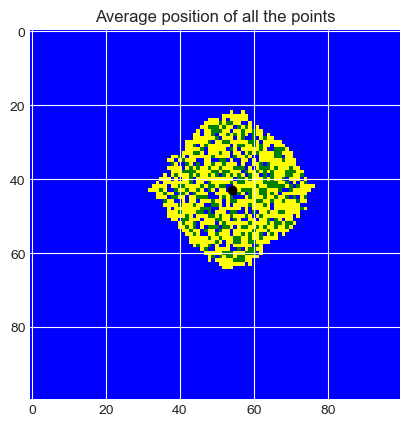

In [240]:
def find_centroid_mean(external_boundary_grid):
    boundary_indices = np.argwhere(external_boundary_grid)
    
    # Calculate the centroid (mean position) of the boundary points.
    centroid_x, centroid_y = np.mean(boundary_indices, axis=0)
    
    # The centroid coordinates are given as (centroid_x, centroid_y).
    # If you need to round them to the nearest integer (since grid indices are integers), you can do:
    centroid_x = int(round(centroid_x))
    centroid_y = int(round(centroid_y))
    
    centroid = (centroid_x, centroid_y)
    return centroid
    
centroid = find_centroid_mean(find_external_boundary_grid(grid))
print(centroid)

# Plotting the result for visual verification
plt.imshow(grid, cmap=cmap, norm=norm)  # Display the original grid
plt.scatter(centroid[1], centroid[0], color='black')  # Unpack the centroid tuple directly into the scatter function
plt.title('Average position of all the points')
plt.show()

In [241]:
from scipy.ndimage import center_of_mass

(43, 54)


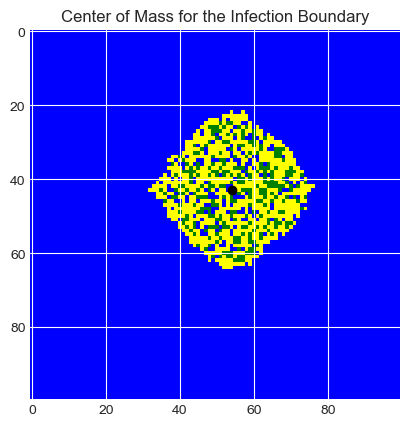

In [242]:
def find_centroid_mass_center(external_boundary_grid):
    # Create a binary array where the boundary is 1 and other areas are 0
    binary_boundary = (external_boundary_grid == 1).astype(int)
    
    # Calculate the center of mass for the binary array representing the boundary
    centroid_row, centroid_col = center_of_mass(binary_boundary)
    
    # Convert centroid coordinates from row, col to x, y
    if np.isnan(centroid_row) or np.isnan(centroid_col):
        centroid_x, centroid_y = None, None
    else:
        # If they're not NaN, round them to the nearest integer to get grid coordinates
        centroid_x, centroid_y = int(round(centroid_row)), int(round(centroid_col))
    
    centroid = (centroid_x, centroid_y) 
    return centroid

centroid = find_centroid_mass_center(find_external_boundary_grid(grid))
print(centroid)

# Plotting the result for visual verification
plt.imshow(grid, cmap=cmap, norm=norm)  # Display the original grid
plt.scatter(centroid[1], centroid[0], color='black')  # Unpack the centroid tuple directly into the scatter function
plt.title('Center of Mass for the Infection Boundary')
plt.show()

* **Complete Observation:** would mean having a view of the entire history of the spread from the initial infection to the current state.
* **Snapshot:** a single picture at a specific time point that shows the state of all nodes at that moment.

To identifiy the source node, I'm looking at a **snapshot** of the grid at a given time step where each cell represents a node that can be in one of two or three states: Susceptible or Infected if the model is **SIS** or susceptible, Infected or recovered if the model is **SIR** or **SIRS**. 

Let's use the **Jordan center** of a graph, which is a node (or nodes) such that the *maximum distance to any other node in the graph is minimized*.

However, I made these assumptions:

* The spread of infection is uniform and at a constant rate.
* The network structure does not change over time.
* The infection spread does not include randomness or variability in transmission rates.

1) I'm using ***Dijkstra's algorithm*** to compute the *shortest distances* between all pairs of nodes (which in this case, translates to the *minimum number of steps* required for the infection to travel from one node to another)
2) For each node **V**, I'm finding **Vm**, which is the longest shortest path from **V** to to any other node (in other words, I'm finding the* maximum distanc*e that the infection would have to travel from **V** to reach the furthest point in the grid.
3) I'm supposing that the source node will be one of the nodes with the smallest **Vm** (it's centrally located with respect to the spread of the infection -> It's the **Jordan Center**) -> I chose this node because it would take the least amount of time for the infection to reach all other nodes from there, since the infection spreads at a constant rate (it would have taken the same amount of time to reach the farthest points).

This idea is good for **SIR** models with *fixed grid* if the infection is yet to reach boundary nodes, or *non-fixed* grid.

In [243]:
import time

In [22]:
def dijkstra(grid, start_pos, model, infected_nodes):
    width, height = grid.shape
    visited = set()
    distances = np.full(grid.shape, np.inf)  # Using np.inf to signify unvisited nodes
    pq = [(0, start_pos)]  # Priority queue: distance, position

    while pq:
        dist, (x,y) = heapq.heappop(pq)

        if (x, y) in visited:
            continue
        visited.add((x, y))
        
        # Calculate the base index for the neighbors in neighbors_map
        base_idx = (x * width + y) * 4
        for k in range(4):
            neighbor_idx = neighbors_map[base_idx + k]
            if neighbor_idx == -1:
                continue  # Skip invalid neighbors
            nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices

            # Check the node's relevance based on the model
            if model == 'SIR' and grid[nx, ny] not in [0, 1]:
                continue  # Skip non-infected/non-recovered nodes for SIR
            if (model in ['SIS', 'SIRS'] and (nx, ny) not in infected_nodes):
                continue  # Skip nodes that are not currently infected for SIS/SIRS

            new_dist = dist + 1
            if new_dist < distances[nx, ny]:
                distances[nx, ny] = new_dist
                heapq.heappush(pq, (new_dist, (nx, ny)))

    # Convert distances back to a dictionary for output consistency, if required
    distances_dict = {(i, j): distances[i, j] for i in range(height) for j in range(width) if distances[i, j] < np.inf}
    return distances_dict

In [23]:
def find_infection_source_dijkstra(grid, model):
    height, width = grid.shape
    
    if model == "SIR":
        # For SIR, consider both infected and recovered nodes as candidates
        candidate_nodes = np.argwhere((grid == 0) | (grid == 1))
    else:
        # For SIS and SIRS, consider nodes that are infected or were infected
        candidate_nodes = infection_nodes(grid)

    centrality_scores = np.zeros_like(grid, dtype=np.float32)

    global_start_time = time.time()
    for i, start_pos in enumerate(candidate_nodes):
        start_time = time.time()
        start_pos_tuple = tuple(start_pos)
        
        # Pass the precomputed infected nodes if applicable
        distances = dijkstra(grid, start_pos_tuple, model, candidate_nodes)

        # Compute centrality score considering distances to other nodes
        total_distance = sum(distances.values())
        num_reachable_nodes = len(distances) - 1  # Exclude the start node itself
        if num_reachable_nodes > 0:
            average_distance = total_distance / num_reachable_nodes
            centrality_scores[start_pos_tuple] = 1 / average_distance
        else:
            centrality_scores[start_pos_tuple] = 0  # No nodes are reachable

        print("Processed node (%d,%d) took %.2f sec" % (start_pos[0], start_pos[1], time.time() - start_time), end='\r')

    # Find the node with the highest centrality score
    source_node = np.unravel_index(np.argmax(centrality_scores), grid.shape)
    print("Total processing time: %.2f sec" % (time.time() - global_start_time))
    
    return source_node

In [251]:
source_node = find_infection_source_dijkstra(grid, model)
print("Infection source node with Dijkstra:", source_node)

Total processing time: 683.19 secsec
Infection source node with Dijkstra: (47, 45)


### BFS

In [244]:
from collections import deque

In [310]:
def bfs(grid, start_pos, model, infected_nodes):
    width, height = grid.shape
    visited = np.zeros_like(grid, dtype=np.int32)  # 0 unvisited, 1 visited
    distances = np.full_like(grid, -1, dtype=np.int32)  # -1 for unreachable nodes
    queue = deque()
    queue.append(start_pos)

    visited[start_pos] = 1
    distances[start_pos] = 0

    while queue:
        x, y = queue.popleft()
        base_index = (x * width + y) * 4
        
        for i in range(4):
            neighbor_idx = neighbors_map[base_index + i]
            if neighbor_idx == -1:
                continue

            nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
            
            if visited[nx, ny] == 0 and ((model == 'SIR' and grid[nx, ny] in [0, 1]) or (model in ['SIS', 'SIRS'] and (nx, ny) in infected_nodes)):
                visited[nx, ny] = 1
                distances[nx, ny] = distances[x, y] + 1
                queue.append((nx, ny))

    return distances

In [311]:
def find_infection_source_bfs(grid, model):
    height, width = grid.shape
    
    candidate_nodes = []
    if model == "SIR":
        # For SIR, consider both infected and recovered nodes as candidates
        candidate_nodes = np.argwhere((grid == 0) | (grid == 1))
    else:
        # For SIS and SIRS, consider nodes that are infected or were infected
        candidate_nodes = infection_nodes(grid)

    centrality_scores = np.zeros_like(grid, dtype=np.float32)

    global_start_time = time.time()
    for i, start_pos in enumerate(candidate_nodes):
        start_time = time.time()
        start_pos_tuple = tuple(start_pos)
        
        # Pass the precomputed infected nodes if applicable
        distances = bfs(grid, start_pos_tuple, model, candidate_nodes)

        # Compute centrality score considering distances to other nodes
        reachable_nodes = distances[distances != -1]  # Exclude unreachable nodes
        num_reachable_nodes = len(reachable_nodes) - 1  # Exclude the start node itself
        total_distance = np.sum(reachable_nodes)
        
        if num_reachable_nodes > 0:
            average_distance = total_distance / num_reachable_nodes
            centrality_scores[start_pos_tuple] = 1 / average_distance
        else:
            centrality_scores[start_pos_tuple] = 0

        print("Processed node (%d,%d) took %.2f sec" % (start_pos[0], start_pos[1], time.time() - start_time), end='\r')

    # Find the node with the highest centrality score
    source_node = np.unravel_index(np.argmax(centrality_scores), grid.shape)
    print("Total processing time: %.2f sec" % (time.time() - global_start_time), end='\r')
    
    return source_node

In [25]:
source_node = find_infection_source_bfs(grid, model)
print("Infection source node with DFS:", source_node)

Infection source node with DFS: (39, 47)


In [247]:
@jit(nopython=True)
def max_euc_distance_to_boundary(x0, y0, boundary_indices):
    """Calculate the maximum Euclidean distance from (x0, y0) to any boundary point."""
    max_distance = 0.0
    for index in range(boundary_indices.shape[0]):
        x, y = boundary_indices[index]
        euc_distance = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
        if euc_distance > max_distance:
            max_distance = euc_distance
    return max_distance

In [248]:
def find_infection_source_euc_distance(grid):
    """Find the source of infection by minimizing the maximum distance to the external boundary."""
    height, width = grid.shape
    start_pos = (height // 2, width // 2)

    # Convert the external boundary to a NumPy array of indices for efficient processing
    external_boundary_grid = find_external_boundary_grid(grid)
    external_boundary_indices = np.argwhere(external_boundary_grid)
    
    # Initialize queue and visited set
    queue = deque([start_pos])
    visited = set([start_pos])
    current_best_node = start_pos
    current_min_max_distance = max_euc_distance_to_boundary(start_pos[0], start_pos[1], external_boundary_indices)

    while queue:
        x0, y0 = queue.popleft()

        # Check all neighbors to find the one with the smallest maximum distance to the boundary
        min_neighbor_distance = float('inf')
        next_node = None

        base_index = (x0 * width + y0) * 4
        for i in range(4):
            neighbor_idx = neighbors_map[base_index + i]
            if neighbor_idx == -1:
                continue

            nx0, ny0 = divmod(neighbor_idx, width)
            if (nx0, ny0) not in visited:
                visited.add((nx0, ny0))
                n_max_distance = max_euc_distance_to_boundary(nx0, ny0, external_boundary_indices)
                if n_max_distance < min_neighbor_distance:
                    min_neighbor_distance = n_max_distance
                    next_node = (nx0, ny0)
                    
        if next_node and min_neighbor_distance < current_min_max_distance:
            # Only proceed if the next node improves the maximum distance
            queue.append(next_node)
            current_min_max_distance = min_neighbor_distance
            current_best_node = next_node

    return current_best_node

In [28]:
source_node = find_infection_source_euc_distance(grid)
print("Infection source node with the random first node:", source_node)

Infection source node with the random first node: (39, 47)


In [29]:
@jit(nopython=True)
def divide_grid(grid, num_divisions):
    height, width = grid.shape
    subgrid_height = height // num_divisions
    subgrid_width = width // num_divisions

    subgrids = []
    for i in range(num_divisions):
        for j in range(num_divisions):
            start_row = i * subgrid_height
            end_row = start_row + subgrid_height
            start_col = j * subgrid_width
            end_col = start_col + subgrid_width

            if i == num_divisions - 1:
                end_row = height
            if j == num_divisions - 1:
                end_col = width

            subgrid = grid[start_row:end_row, start_col:end_col]
            subgrids.append(subgrid)

    return subgrids

In [30]:
def simulate_and_visualize(grid, delta, gamma, beta, boundary_condition, model, num_divisions):
    # Assume colors_grid() returns a colormap and a normalization instance
    cmap, norm = colors_grid()  # Set up the color map and normalization
    
    # Start the simulation
    steps = 50
    for _ in range(50):
        grid = simulate_epidemic_step(grid, delta, gamma, beta, boundary_condition, model)
        
    # Display the grid with division lines
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap=cmap, norm=norm)
        
    # Add division lines
    height, width = grid.shape
    subgrid_size = height // num_divisions
    for i in range(1, num_divisions):
        plt.axhline(y=i * subgrid_size - 0.5, color='black', linewidth=2)
        plt.axvline(x=i * subgrid_size - 0.5, color='black', linewidth=2)

    plt.title('Simulation Step with Subgrid Divisions')
    plt.show()

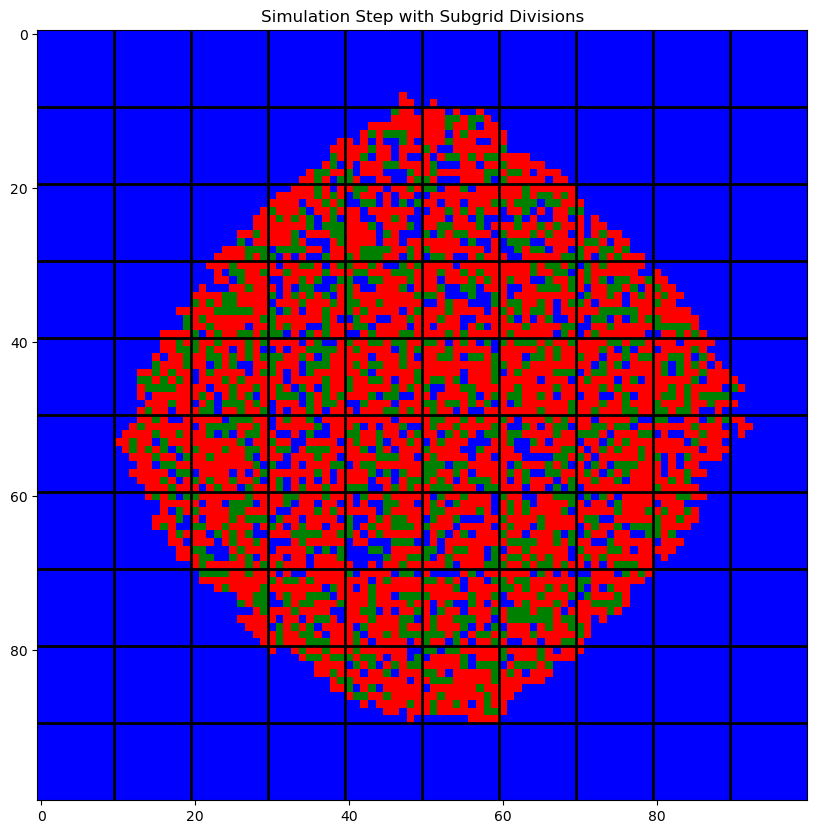

In [30]:
grid = np.full((width, height), -1)
source = (50, 50)
grid[source] = 0
delta, gamma, beta = 0.7, 0.2, 0.4
boundary_condition = 'non-fixed'
model = 'SIRS'
num_divisions = 10

simulate_and_visualize(grid, delta, gamma, beta, boundary_condition, model, num_divisions)

* Complexity : time, scaling with size grid
* Accuracy
* Handling boudaries


- RAndom Geometric graphs

## Success Rate of Infection Source Recovery Over Time

In [249]:
from matplotlib import colors

In [250]:
def Infection_Source_Recovery_Rate1(true_source, model, boundary_condition):
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 2
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        print(f"We are on step: {current_step}")
        for i in range(grids_number):
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            predicted_source = find_infection_source_bfs(grids[i], model)
            if true_source in get_all_neighbors_including_center(*predicted_source, width, height, boundary_condition):
                success_count += 1

        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        if check_for_equilibrium(infected_counts):
            equilibrium_reached = True
    
    return success_fraction_per_step

In [251]:
def Infection_Source_Recovery_Rate1(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 2
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ")
            predicted_source = find_infection_source_bfs(grids[i], model)
            if true_source in get_all_neighbors_including_center(*predicted_source, width, height, boundary_condition):
                success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)

        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Annotate selectively
        for i, rate in enumerate(success_rates):
            if i % 5 == 0:  # Annotate every 5 steps for clarity
                ax.annotate(f'{int(rate * grids_number)}', xy=(time_steps[i], rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-40
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)

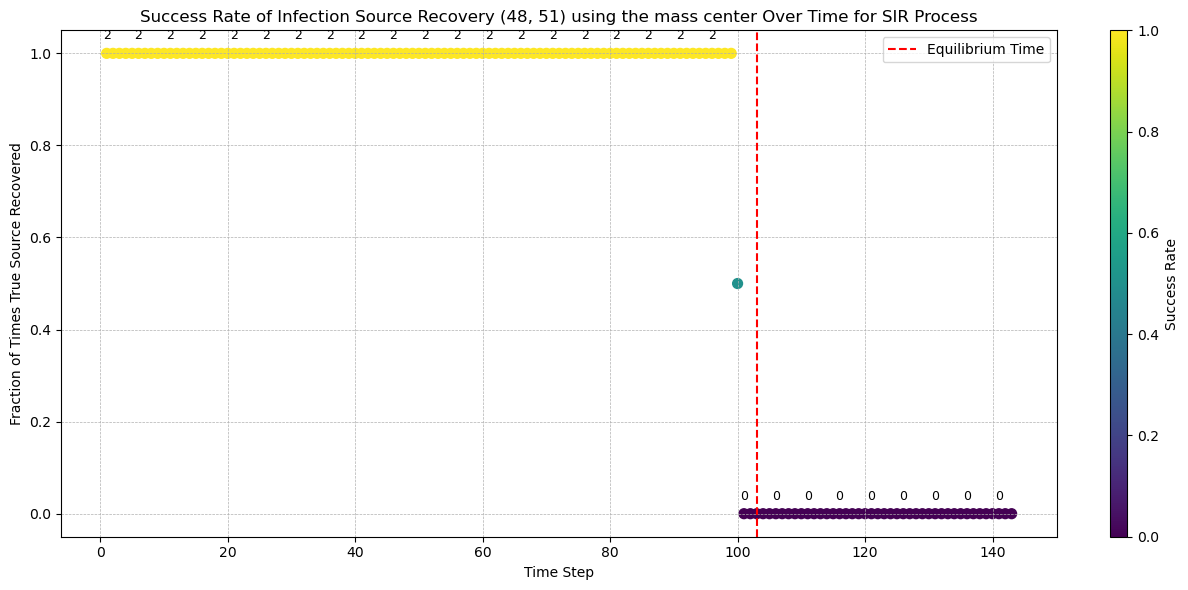

In [31]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate1((48,51), 'SIR', 'non-fixed')

In [ ]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate1((48,51), 'SIS', 'non-fixed')

In [ ]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
SIRS_nonFixed_4851 = Infection_Source_Recovery_Rate1((48,51), 'SIRS', 'non-fixed')

We are on step: 0
We are on step: 1time: 0.39 sec3 sec
We are on step: 2time: 1.13 sec6 sec
We are on step: 3time: 2.27 sec9 sec
We are on step: 4time: 3.79 sec6 sec
We are on step: 5time: 6.21 sec3 sec
We are on step: 6time: 7.99 sec9 sec
We are on step: 7time: 10.71 sec sec
We are on step: 8time: 15.25 sec sec
We are on step: 9time: 19.91 sec sec
We are on step: 10ime: 24.49 sec sec
We are on step: 11ime: 39.61 sec sec
We are on step: 12ime: 38.71 sec sec
We are on step: 13ime: 47.17 sec sec
We are on step: 14ime: 56.35 sec sec
We are on step: 15ime: 66.61 sec sec
We are on step: 16ime: 82.73 sec sec
We are on step: 17ime: 101.46 secsec
We are on step: 18ime: 115.77 secsec
We are on step: 19ime: 136.07 secsec
We are on step: 20ime: 156.67 secsec
We are on step: 21ime: 188.47 secsec
We are on step: 22ime: 210.42 secsec
We are on step: 23ime: 243.94 secsec
We are on step: 24ime: 285.05 secsec
We are on step: 25ime: 339.03 secsec
We are on step: 26ime: 381.69 secsec
We are on step: 27im

In [ ]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate1((30,70), 'SIR', 'fixed') # You can ignore the equilibrium time here (it's wrong)

In [ ]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate1((30,70), 'SIR', 'non-fixed')

### Since it takes a lot of time, we're going to run the Jordan algorithm on the cloud with more grids for more accuracy

In [252]:
plt.style.use('seaborn-v0_8-darkgrid')

In [253]:
def Infection_Source_Recovery_Rate2(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 200
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    distance_errors = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        total_distance_error = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ", end='\r')
            external_boundary_grid = find_external_boundary_grid(grids[i])
            predicted_source = find_centroid_mass_center(external_boundary_grid)
            if predicted_source is not None and not any(x is None for x in predicted_source):
                distance_error = np.linalg.norm(np.array(true_source) - np.array(predicted_source))
                total_distance_error += distance_error
                if true_source == predicted_source:
                    success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        average_distance_error = total_distance_error / grids_number
        distance_errors.append(average_distance_error)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)
    
        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Annotate selectively
        for i, rate in enumerate(success_rates):
            if i % 5 == 0:  # Annotate every 5 steps for clarity
                ax.annotate(f'{int(rate * grids_number)}', xy=(time_steps[i], rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-10
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)

    # Plot the distance error over time
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(range(1, current_step + 1), distance_errors, marker='o')
    ax.set_title('Distance Error Between True Source and Predicted Source Over Time')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Average Distance Error')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [254]:
def Infection_Source_Recovery_Rate2(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 200
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ", end='\r')
            external_boundary_grid = find_external_boundary_grid(grids[i])
            predicted_source = find_centroid_mass_center(external_boundary_grid)
            if predicted_source is not None and not any(x is None for x in predicted_source):
                if true_source in get_all_neighbors_including_center(*predicted_source, width, height, boundary_condition):
                    success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)
    
        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Annotate selectively
        for i, rate in enumerate(success_rates):
            if i % 5 == 0:  # Annotate every 5 steps for clarity
                ax.annotate(f'{int(rate * grids_number)}', xy=(time_steps[i], rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-10
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)

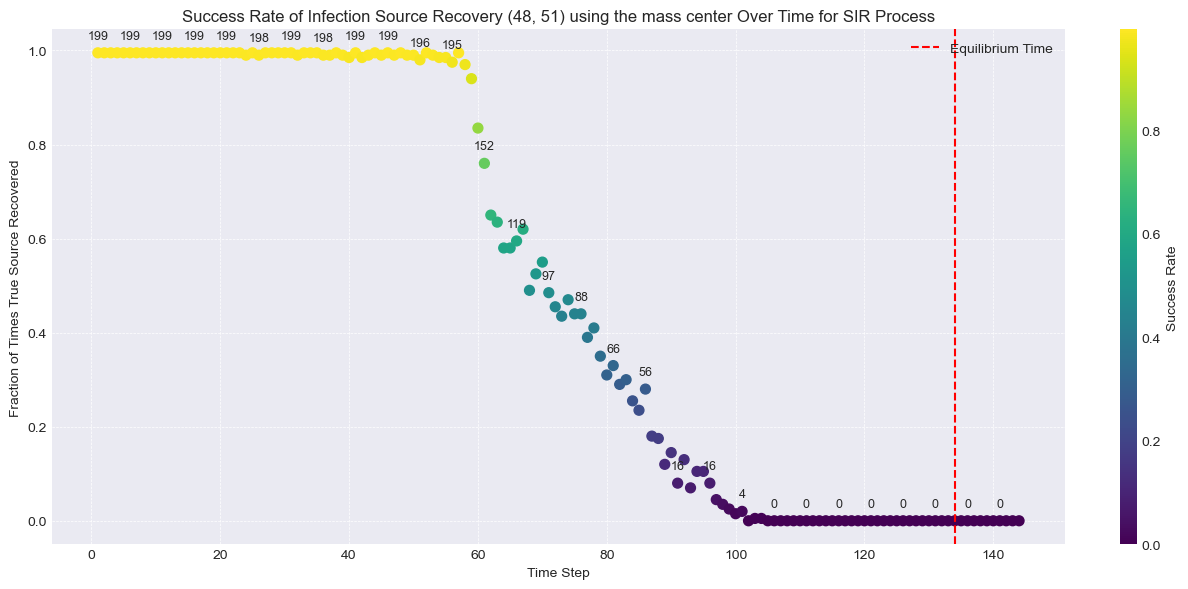

In [39]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((48, 51), 'SIR', 'non-fixed')

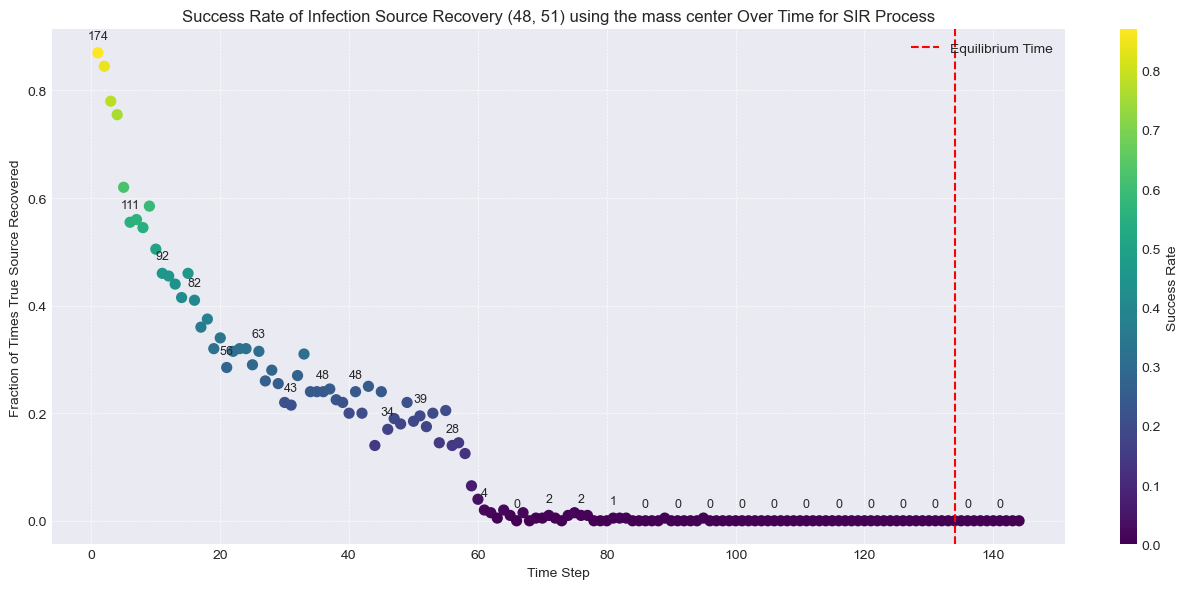

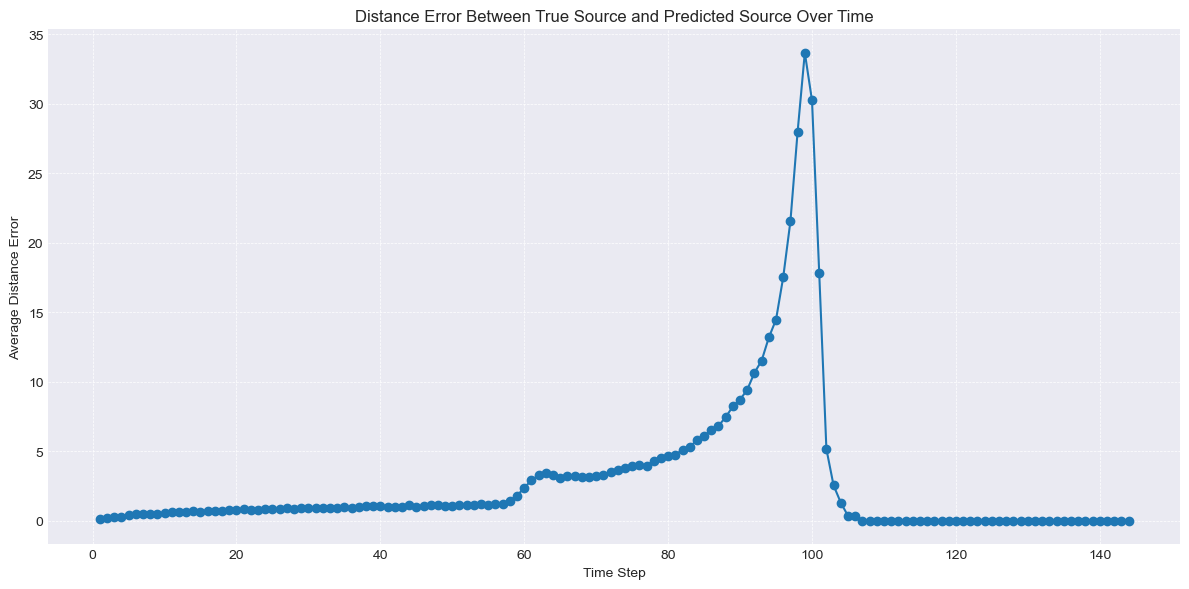

In [42]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((48, 51), 'SIR', 'non-fixed')

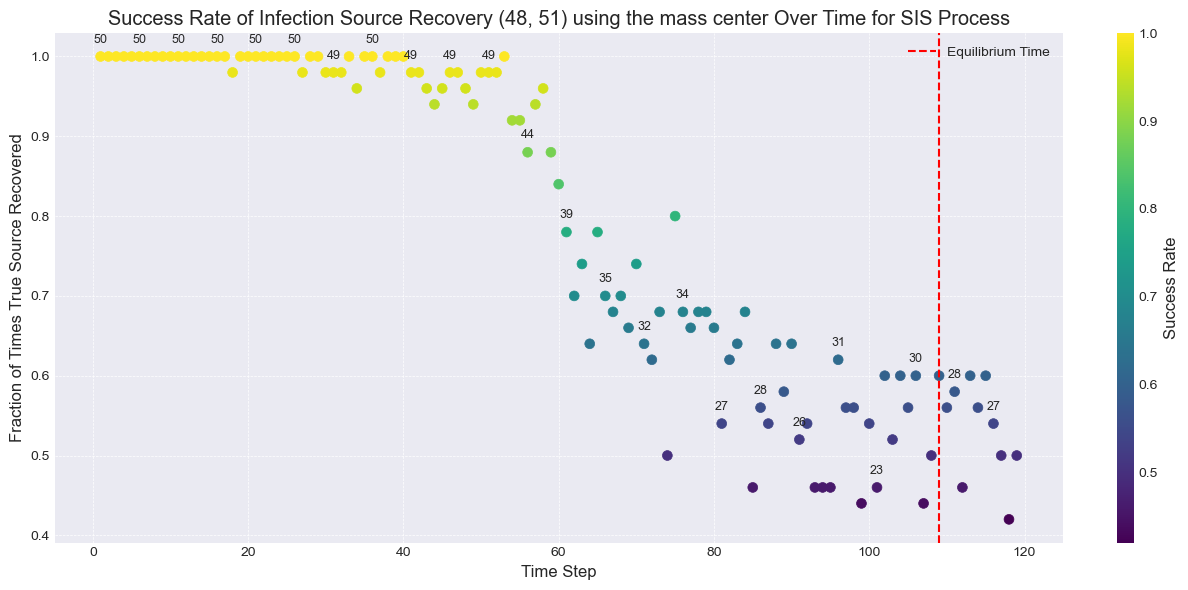

In [84]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((43, 45), 'SIS', 'non-fixed')

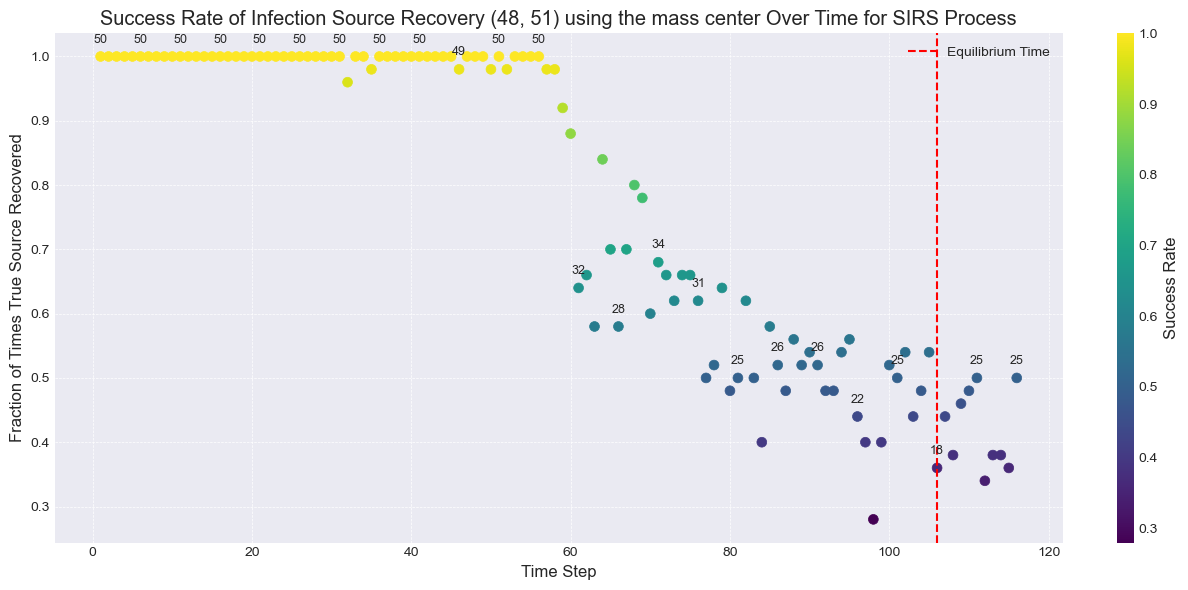

In [85]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((48, 51), 'SIRS', 'non-fixed')

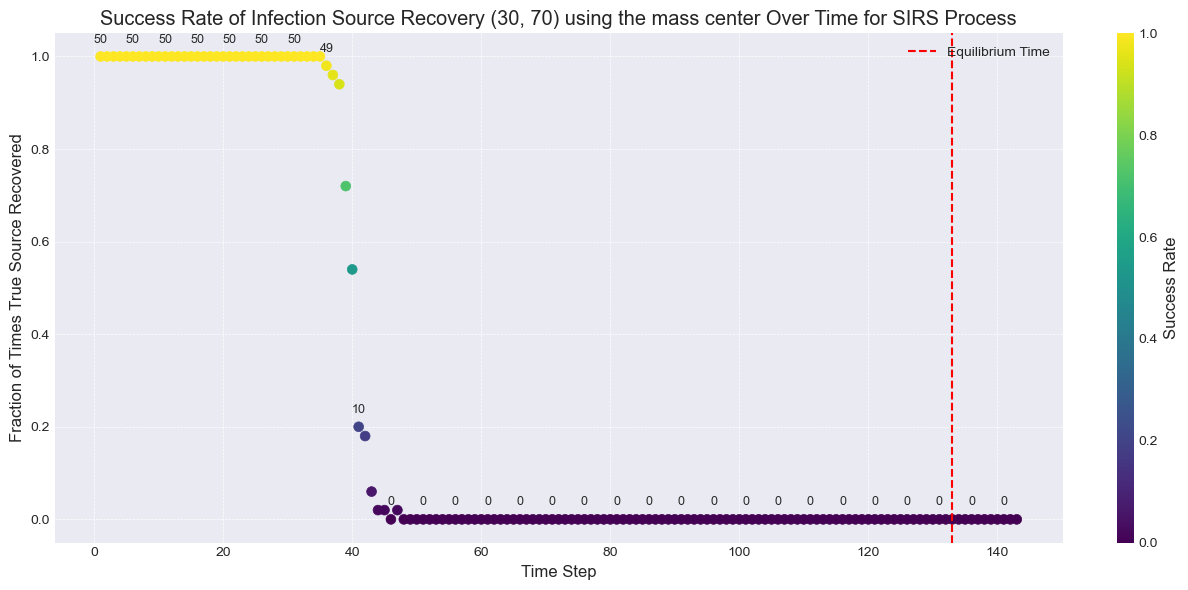

In [86]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((30, 70), 'SIRS', 'fixed')

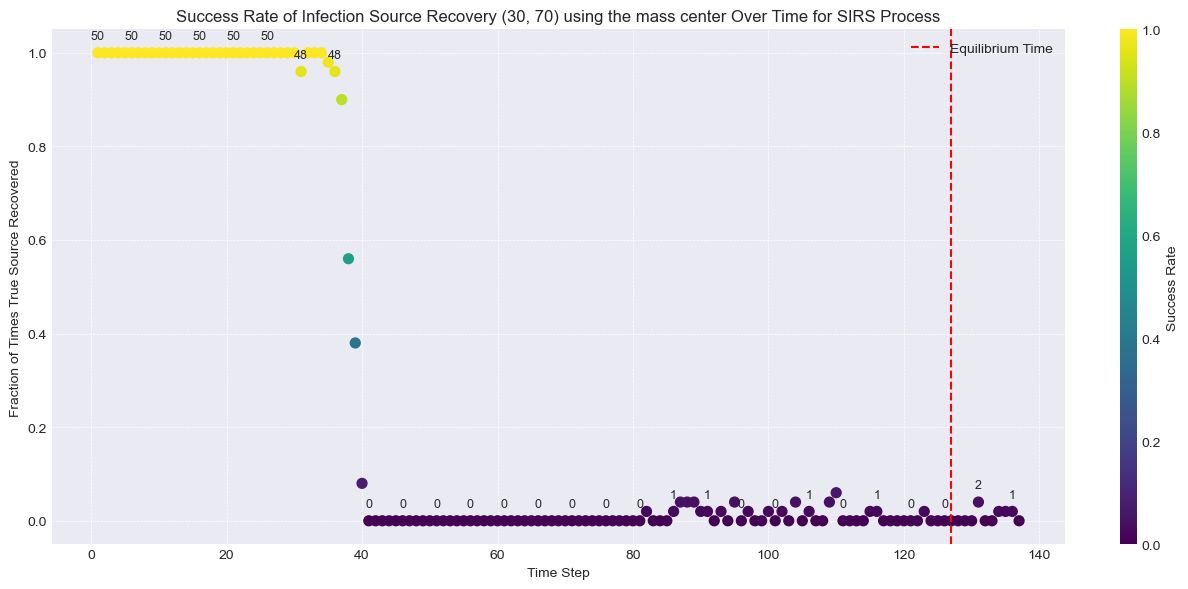

In [70]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((30, 70), 'SIRS', 'non-fixed')

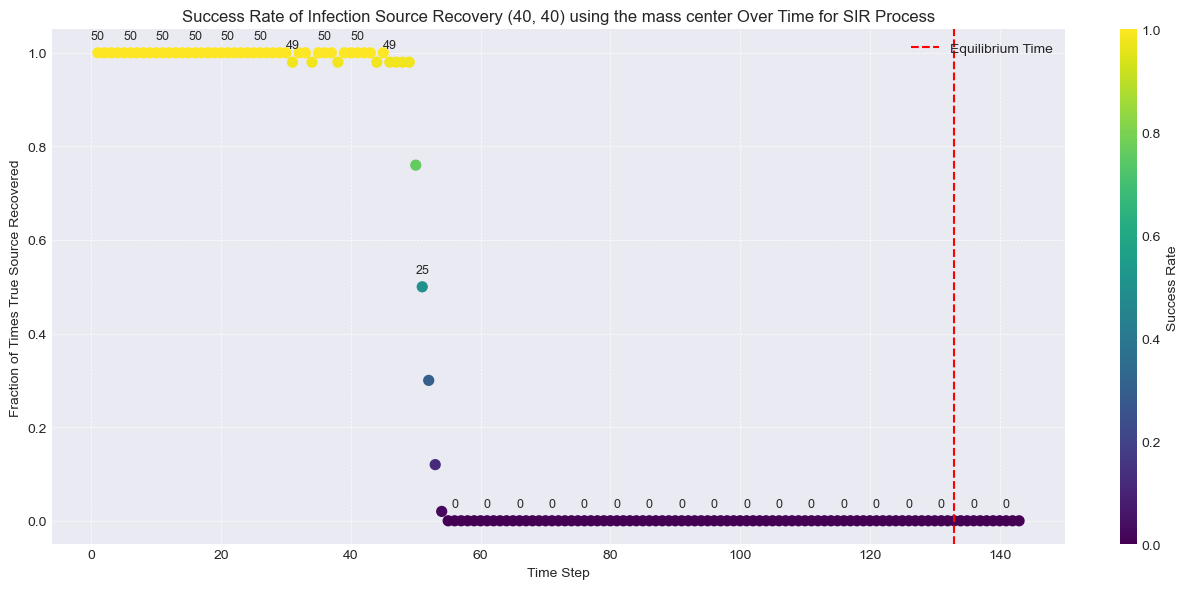

In [72]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate2((40, 40), 'SIR', 'non-fixed')

In [255]:
def Infection_Source_Recovery_Rate2(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 500
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    stop = 65
    i = 0
    while i != stop:
        success_count = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ", end='\r')
            external_boundary_grid = find_external_boundary_grid(grids[i])
            predicted_source = find_centroid_mass_center(external_boundary_grid)
            if predicted_source is not None and not any(x is None for x in predicted_source):
                if true_source == predicted_source:
                    success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)
    
        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-10
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)
        i += 1

In [256]:
def Infection_Source_Recovery_Rate3(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 50
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ", end='\r')
            predicted_source = find_infection_source_euc_distance(grids[i])
            if true_source in get_all_neighbors_including_center(predicted_source[0], predicted_source[1], width, height, boundary_condition):
                success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)
    
   
        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Annotate selectively
        for i, rate in enumerate(success_rates):
            if i % 5 == 0:  # Annotate every 5 steps for clarity
                ax.annotate(f'{int(rate * grids_number)}', xy=(time_steps[i], rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-10
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)

In [257]:
def Infection_Source_Recovery_Rate3(true_source, model, boundary_condition):
    cmap, norm = colors_grid()
    
    # Initialize parameters
    width, height = 100, 100
    delta, gamma, beta = 0.7, 0.2, 0.4
    grids_number = 50
    current_step = 0
    success_fraction_per_step = []
    infected_counts = []
    
    # Initialize grids
    grids = [np.full((width, height), -1) for _ in range(grids_number)]
    for grid in grids:
        grid[true_source] = 0  # Infect the source node in each grid
    
    # Simulation loop
    equilibrium_reached = False
    while not equilibrium_reached:
        success_count = 0
        
        # Print the current step
        print(f"We are on step: {current_step}")
        
        for i in range(grids_number):
            # Perform one step of the epidemic simulation for each grid
            grids[i] = simulate_epidemic_step(grids[i], delta, gamma, beta, boundary_condition, model)
            
            # Attempt to recover the source and check for success on each grid
            print(f"Plot: {i+1} ", end='\r')
            predicted_source = find_infection_source_euc_distance(grids[i])
            if true_source == predicted_source:
                success_count += 1
    
        current_step += 1
        success_fraction = success_count / grids_number
        success_fraction_per_step.append(success_fraction)
        
        # Check for equilibrium using the first grid as a reference
        infected_counts.append(np.count_nonzero(grids[0] == 0))
        equilibrium_reached = check_for_equilibrium(infected_counts)
    
   
        # Inside your simulation loop
        clear_output(wait=True)
        # Normalization for the color map based on success rates
        normalize = colors.Normalize(vmin=min(success_fraction_per_step), vmax=max(success_fraction_per_step))
        fig, ax = plt.subplots(figsize=(12, 6))
        time_steps = range(1, current_step + 1)
        success_rates = success_fraction_per_step
        scatter = ax.scatter(time_steps, success_rates, c=success_rates, cmap='viridis', norm=normalize, s=50)  # s is the size of points
        # Add a color bar for reference
        cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, aspect=30)
        cbar.set_label('Success Rate')
        
        # Annotate selectively
        for i, rate in enumerate(success_rates):
            if i % 5 == 0:  # Annotate every 5 steps for clarity
                ax.annotate(f'{int(rate * grids_number)}', xy=(time_steps[i], rate), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
        
        # Highlight the equilibrium time if reached
        if equilibrium_reached:
            eq_step = current_step-10
            ax.axvline(x=eq_step, color='red', linestyle='--', label='Equilibrium Time')
            ax.legend(loc='upper right')
    
        # Set titles and labels
        ax.set_title(f'Success Rate of Infection Source Recovery {true_source} using the mass center Over Time for {model} Process')
        ax.set_xlabel('Time Step')
        ax.set_ylabel('Fraction of Times True Source Recovered')

        # Add grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adjust the layout
        plt.tight_layout()
        
        # Display the plot
        plt.show()

        if current_step >= 30 and current_step % 10 == 0:
            # Select a random grid and plot it
            random_grid_index = np.random.randint(len(grids))  # Choose a random index
            grid_fig, grid_ax = plt.subplots(figsize=(6, 6))
            grid_ax.imshow(grids[random_grid_index], cmap=cmap, norm=norm)
            grid_ax.set_title(f'Random grid at step {current_step}')
            plt.show()
        
        # Pause briefly to ensure the plot is displayed before continuing
        plt.pause(0.1)

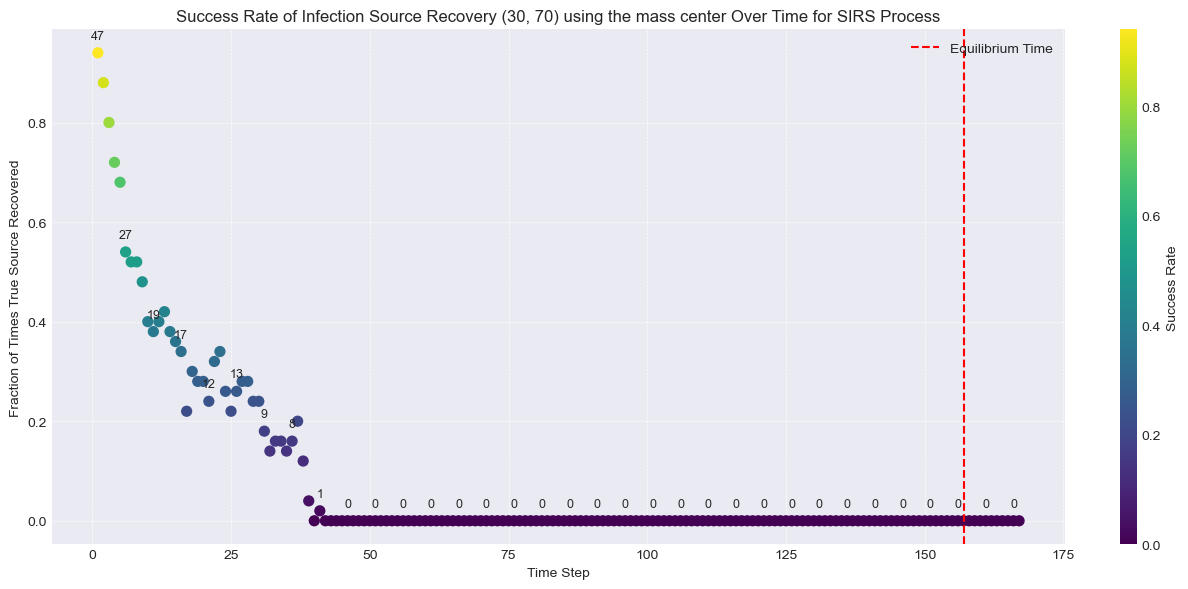

In [40]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate3((30, 70), 'SIRS', 'fixed')

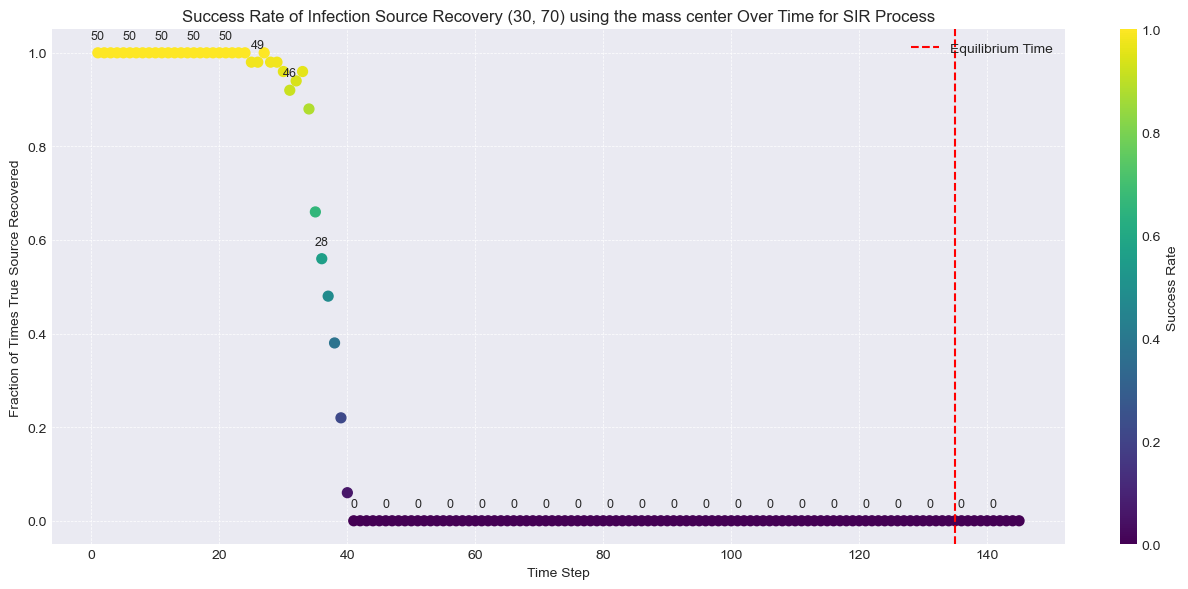

In [63]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate3((30,70), 'SIR', 'non-fixed')

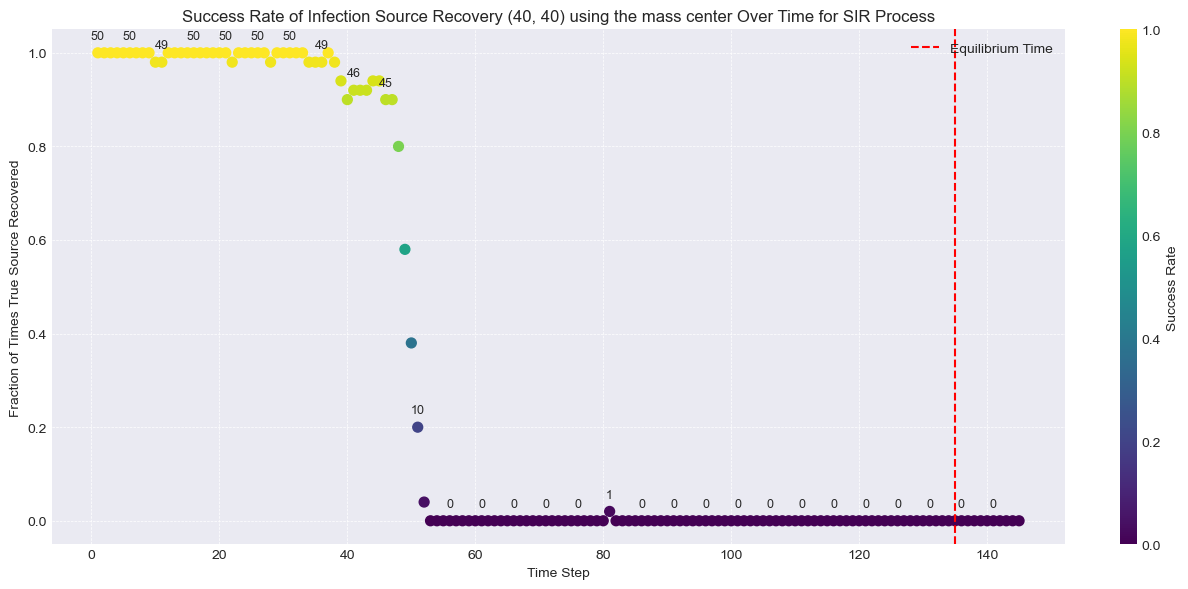

In [65]:
neighbors_map = get_all_neighbors(width, height, boundary_condition)
Infection_Source_Recovery_Rate3((40,40), 'SIR', 'non-fixed')

## Other network models

In [258]:
from collections import deque

In [259]:
def plot_graph(G, pos, step):
    color_map = {-1: 'blue', 0: 'red', 1: 'green'}
    node_colors = [color_map[G.nodes[node]['status']] for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color='gray')
    plt.title(f"Infection Simulation at Step {step}")
    plt.show()

In [260]:
def infection_nodes_network(G):
    affected_nodes = set()
    for node in G.nodes():
        status = G.nodes[node]['status']
        if status in [0, 1]:  # Current status is either infected (0) or recovered (1)
            affected_nodes.add(node)
        elif status == -1:  # Susceptible nodes
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['status'] in [0, 1]:
                    affected_nodes.add(node)
                    break  # Only need one infected or recovered neighbor to qualify
    return list(affected_nodes)

In [261]:
def simulate_epidemic_step_network(G, beta, gamma, delta, model):
    new_statuses = {}
    for node in G.nodes():
        if G.nodes[node]['status'] == -1:  # Susceptible
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['status'] == 0:
                    if np.random.random() < beta:
                        new_statuses[node] = 0  # Infected
                        break
        if G.nodes[node]['status'] == 0:
            if np.random.random() < gamma:  # Infected
                if model in ['SIRS', 'SIR']: 
                    new_statuses[node] = 1  # Recovered if SIRS or SIR
                else:
                    new_statuses[node] = -1  # Susceptible if SIS
        if G.nodes[node]['status'] == 1 and model == 'SIRS':  # Recovered
            if np.random.random() < delta:
                new_statuses[node] = -1  # Susceptible again
    nx.set_node_attributes(G, new_statuses, 'status')

In [262]:
def normalize_scores(scores):
    min_score = min(scores.values())
    max_score = max(scores.values())
    if max_score == min_score:  # Avoid division by zero if all values are the same
        return {node: 1.0 for node in scores}
    return {node: (scores[node] - min_score) / (max_score - min_score) for node in scores}

In [263]:
def time_function(func, *args):
    start_time = time.time()
    result = func(*args)
    elapsed_time = time.time() - start_time
    return result, elapsed_time

In [264]:
def plot_metrics(results, metric, title):
    labels = results.keys()
    values = [results[label][metric] for label in labels]
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Centrality Measures')
    plt.ylabel(metric.capitalize())
    plt.title(title)
    plt.show()

In [265]:
def evaluate_centrality_measures(G, initial_infected, steps=10):
    model = 'SIR'
    results = {name: {'correct': 0, 'time': 0, 'total_runs': 0} for name in centrality_functions.keys()}
    
    for step in range(steps):
        simulate_epidemic_step_network(G, 0.7, 0.2, 0.4, model)
        candidate_nodes = infection_nodes_network(G) if model in ['SIS', 'SIRS'] else [n for n, attr in G.nodes(data=True) if attr['status'] in [0, 1]]
        
        for name, func in centrality_functions.items():
            source_node, taken_time = time_function(func, G, candidate_nodes)
            results[name]['time'] += taken_time
            results[name]['total_runs'] += 1
            if isinstance(source_node, list):
                if initial_infected in source_node:
                    results[name]['correct'] += 1
            else:
                if source_node == initial_infected:
                    results[name]['correct'] += 1
    
    for name, metrics in results.items():
        accuracy = metrics['correct'] / metrics['total_runs']
        avg_time = metrics['time'] / metrics['total_runs']
        print(f"{name}: Accuracy = {accuracy:.2f}, Average Time = {avg_time:.2f} seconds")
        metrics['accuracy'] = accuracy
        metrics['avg_time'] = avg_time
    
    return results

### Identifying the Source of Infection Using Jordan Center
#### Overview
In epidemiological modeling, the ***Jordan center*** is utilized to pinpoint the most central node in a network based on graph distances. The Jordan center of a graph consists of the node with the *minimum eccentricity*, which is defined as the greatest shortest path distance between a node and any other node in the graph. These nodes are equidistant from the farthest nodes in the network, suggesting their centrality in the spread of the infection.
#### Methodology
1. Candidate Nodes
2. Subgraph Creation
3. Eccentricity Calculation (maximum shortest path distance from a given node to all other nodes in the subgraph)
4. Identify Jordan Center (the node with the minimum eccentricity)

In [266]:
def find_jordan_center(G, candidate_nodes):
    subG = G.subgraph(candidate_nodes)
    eccentricity = nx.eccentricity(subG)
    min_eccentricity = min(eccentricity.values())
    jordan_center = [node for node, ecc in eccentricity.items() if ecc == min_eccentricity]
    return jordan_center

In [267]:
def betweenness_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.betweenness_centrality(subgraph)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

In [268]:
def eigenvector_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

In [269]:
def closeness_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.closeness_centrality(subgraph)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

In [270]:
from collections import defaultdict, deque

def reverse_infection_simulation(G, infected_nodes):
    node_scores = defaultdict(int)
    for simulation_run in range(100):
        for node in infected_nodes:
            queue = deque([node])
            visited = set()
            step = 0
            while queue:
                current_node = queue.popleft()
                if current_node in visited:
                    continue
                visited.add(current_node)
                node_scores[current_node] += step  # Step count is the score
                step += 1
                for neighbor in G.neighbors(current_node):
                    if neighbor not in visited:
                        queue.append(neighbor)
    
    for node in node_scores:
        node_scores[node] /= simulation_run # Normalization
    
    source_candidate = min(node_scores, key=node_scores.get) # The node with the minimum score
    return source_candidate

### Source Node Identification using Eccentricity and Closeness Centrality
#### Overview
This function employs a combination of two classical centrality measures—***Eccentricity*** and ***Closeness Centrality***—to pinpoint the most likely source of the infection.
#### Centrality Measures Explained
* ***Eccentricity:*** This measure reflects the maximum distance from a node to all other nodes in the network. In the context of infection tracking, a lower eccentricity value indicates that a node can spread an infection faster across the entire network, making it a potential source.
* ***Closeness Centrality:*** This metric quantifies how close a node is to all other nodes in the network, considering the shortest paths. A higher closeness centrality score suggests that a node has shorter paths to all other nodes, potentially indicating that the node had early access to the infection, thus a candidate for the source.
#### Methodology
1. Candidate Nodes
2. Subgraph Construction
3. Centrality Calculation
4. Normalization and Combination
5. Identifying the source

In [271]:
def find_source_node_EC_CC(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    eccentricity = nx.eccentricity(subgraph)
    closeness = nx.closeness_centrality(subgraph)
    norm_ecc = normalize_scores(eccentricity)
    norm_close = normalize_scores(closeness)
    combined_scores = {node: (1 - norm_ecc[node]) + norm_close[node] for node in candidate_nodes}
    source_node = max(candidate_nodes, key=combined_scores.get)
    return source_node

In [272]:
def identify_source(G, candidate_nodes):
    statuses = nx.get_node_attributes(G, 'status')  # status should be -1, 0, or 1

    # Calculate centralities
    betweenness = nx.betweenness_centrality(G, normalized=True)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

    # Calculate eccentricity on the subgraph of infected and recovered
    subgraph = G.subgraph(candidate_nodes)
    eccentricity = nx.eccentricity(subgraph)

    # Score nodes
    scores = {node: betweenness[node] + eigenvector[node] + 1/eccentricity[node] for node in candidate_nodes}

    source_candidate = max(scores, key=scores.get)
    return source_candidate

### Identifying the Source of Infection Using Rumor Centrality
We employ the concept of ***Rumor Centrality*** to estimate the origin of the infection. Rumor Centrality is a measure based on the idea that the most likely source of an infection in a network is the node that maximizes the number of different spreading sequences—essentially, the node that would maximize the likelihood of the observed spread pattern if it were the source.
* Centrality Calculation:
    * *Subtree Sizes:* For each node considered as a potential source, calculate the sizes of subtrees rooted at this node, only including nodes that are infected or recovered. This is because only these nodes are relevant for tracing the path of the infection.
    * *Rumor Centrality Score:* For each node, calculate its rumor centrality based on its subtree sizes. The centrality score for a node is essentially the number of distinct spreading trees (rooted at the node) that could explain the observed spread of infection.

In [273]:
import math

In [274]:
def rumor_centrality(G, candidate_nodes):
    candidate_subgraph = G.subgraph(candidate_nodes)
    best_node = None
    max_centrality = -1
    for node in candidate_subgraph.nodes():
        tree = nx.bfs_tree(candidate_subgraph, source=node)
        centrality = calculate_rumor_centrality(tree, node)
        node_centrality = centrality[node]
        if node_centrality > max_centrality:
            max_centrality = node_centrality
            best_node = node
    return best_node

def calculate_rumor_centrality(tree, root):
    subtree_size = {}
    centrality = {}
    def dfs(node, parent):
        size = 1
        product = 1
        for neighbor in tree.neighbors(node):
            if neighbor != parent:
                child_size, child_product = dfs(neighbor, node)
                size += child_size
                product *= child_product * child_size
        subtree_size[node] = size
        centrality[node] = product
        return size, product
    dfs(root, None)
    return centrality

## Random Geometric Graphs

In [275]:
def create_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    pos = nx.get_node_attributes(G, 'pos')

    # Select a random node as the initial infected source
    initial_infected = np.random.randint(0, n)

    # -1 for susceptible, 0 for infected, 1 for recovered
    nx.set_node_attributes(G, -1, 'status')  # Initially, all nodes are susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Set the initial infected node

    plot_graph(G, pos, 0)
    return G, pos, initial_infected

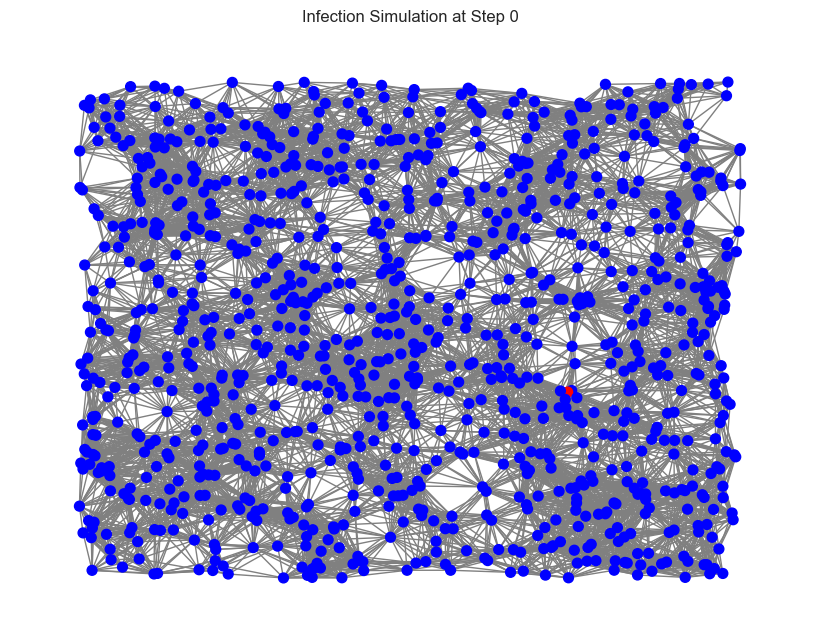

Initial infected node (true source): 108


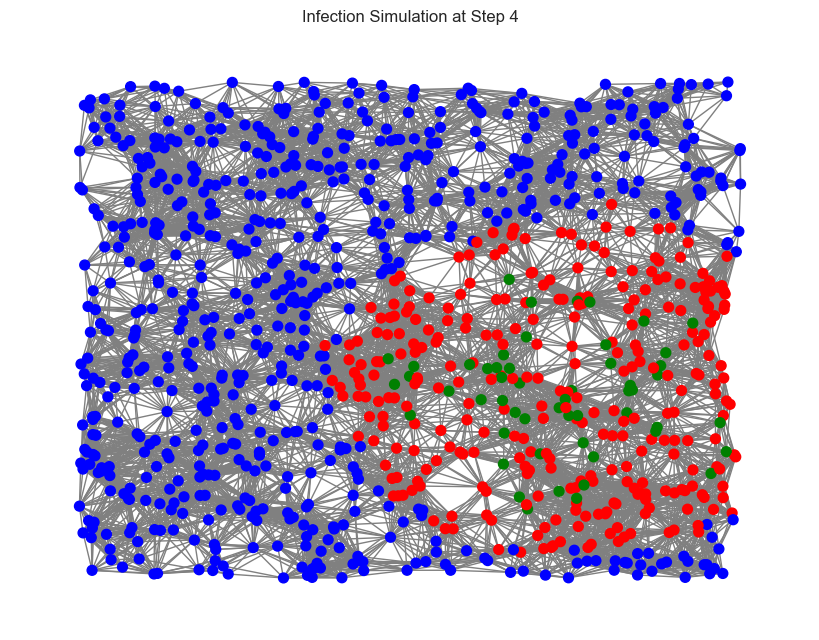

Source node identification using EC & CC: 108 took 8.94 seconds
Source node identification using EC (Jordan Center): [70, 108, 516] took 4.28 seconds
Source node identification using Rumor Centrality: 243 took 6.87 seconds


In [69]:
G, pos, initial_infected = create_random_geometric_graph(1000, 0.1)
print(f"Initial infected node (true source): {initial_infected}")

model = 'SIR'
# Perform simulation and find source
for _ in range(4):
    simulate_epidemic_step_network(G, 0.7, 0.2, 0.4, model)
plot_graph(G, pos, 4)

candidate_nodes = infection_nodes_network(G) if model in ['SIS', 'SIRS'] else [n for n, attr in G.nodes(data=True) if attr['status'] in [0, 1]]

source_node, taken_time = time_function(find_source_node_EC_CC, G, candidate_nodes)
print(f"Source node identification using EC & CC: {source_node} took {taken_time:.2f} seconds")

source_node, taken_time = time_function(find_jordan_center, G, candidate_nodes)
print(f"Source node identification using EC (Jordan Center): {source_node} took {taken_time:.2f} seconds")

source_node, taken_time = time_function(rumor_centrality, G, candidate_nodes)
print(f"Source node identification using Rumor Centrality: {source_node} took {taken_time:.2f} seconds")

## Erdős–Rényi graphs

Let's proceed with the **Erdős–Rényi** graph model. **Erdős–Rényi** graphs are generated by connecting nodes randomly. Each edge is included in the graph with a probability 𝑝, independent from every other edge. These graphs are a popular model for studying the properties of random graphs and are also used to model the spread of diseases or information in networks where connections are random.

In [279]:
def create_er_graph(n, p):
    G = nx.erdos_renyi_graph(n, p)
    initial_infected = np.random.choice(G.nodes())
    nx.set_node_attributes(G, -1, 'status')  # All nodes initially susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Initial infected node
    return G, initial_infected

In [ ]:
#Function to create a Random Geometric graph
def create_random_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    pos = nx.get_node_attributes(G, 'pos')

    # Select a random node as the initial infected source
    initial_infected = np.random.randint(0, n)

    # -1 for susceptible, 0 for infected, 1 for recovered
    nx.set_node_attributes(G, -1, 'status')  # Initially, all nodes are susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Set the initial infected node

    plot_graph(G, pos, 0)
    return G, pos, initial_infected

#Function to create an Erdos-Renyi graph
def create_er_graph(n, p):
    G = nx.erdos_renyi_graph(n, p)
    initial_infected = np.random.choice(G.nodes())
    nx.set_node_attributes(G, -1, 'status')  # All nodes initially susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Initial infected node
    return G, initial_infected

#Function to create a Random Regular graph
def create_random_regular_graph(num_nodes, degree):
    G = nx.random_regular_graph(degree, num_nodes)
    initial_infected = np.random.choice(list(G.nodes()))
    nx.set_node_attributes(G, -1, 'status')  # All nodes initially susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Initial infected node
    return G, initial_infected

# Function to simulate an epidemic step in the network
def simulate_epidemic_step_network(G, beta, gamma, delta, model):
    new_statuses = {}
    for node in G.nodes():
        if G.nodes[node]['status'] == -1:  # Susceptible
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['status'] == 0:
                    if np.random.random() < beta:
                        new_statuses[node] = 0  # Infected
                        break
        if G.nodes[node]['status'] == 0:
            if np.random.random() < gamma:  # Infected
                if model in ['SIRS', 'SIR']: 
                    new_statuses[node] = 1  # Recovered if SIRS or SIR
                else:
                    new_statuses[node] = -1  # Susceptible if SIS
        if G.nodes[node]['status'] == 1 and model == 'SIRS':  # Recovered
            if np.random.random() < delta:
                new_statuses[node] = -1  # Susceptible again
    nx.set_node_attributes(G, new_statuses, 'status')

# Function to find infected nodes in the network
def infection_nodes_network(G):
    affected_nodes = set()
    for node in G.nodes():
        status = G.nodes[node]['status']
        if status in [0, 1]:  # Current status is either infected (0) or recovered (1)
            affected_nodes.add(node)
        elif status == -1:  # Susceptible nodes
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['status'] in [0, 1]:
                    affected_nodes.add(node)
                    break  # Only need one infected or recovered neighbor to qualify
    return list(affected_nodes)

# Function to plot the graph
def plot_graph(G, pos, step):
    color_map = {-1: 'blue', 0: 'red', 1: 'green'}
    node_colors = [color_map[G.nodes[node]['status']] for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color='gray')
    plt.title(f"Infection Simulation at Step {step}")
    plt.show()

# Centrality measures
def find_source_node_EC_CC(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    eccentricity = nx.eccentricity(subgraph)
    closeness = nx.closeness_centrality(subgraph)
    norm_ecc = normalize_scores(eccentricity)
    norm_close = normalize_scores(closeness)
    combined_scores = {node: (1 - norm_ecc[node]) + norm_close[node] for node in candidate_nodes}
    source_node = max(candidate_nodes, key=combined_scores.get)
    return source_node

def find_jordan_center(G, candidate_nodes):
    subG = G.subgraph(candidate_nodes)
    eccentricity = nx.eccentricity(subG)
    min_eccentricity = min(eccentricity.values())
    jordan_center = [node for node, ecc in eccentricity.items() if ecc == min_eccentricity]
    return jordan_center

def normalize_scores(scores):
    min_score = min(scores.values())
    max_score = max(scores.values())
    if max_score == min_score:  # Avoid division by zero if all values are the same
        return {node: 1.0 for node in scores}
    return {node: (scores[node] - min_score) / (max_score - min_score) for node in scores}

# Timing function
def time_function(func, *args):
    start_time = time.time()
    result = func(*args)
    elapsed_time = time.time() - start_time
    return result, elapsed_time

# Additional centrality measures
def betweenness_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.betweenness_centrality(subgraph)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

def eigenvector_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

def closeness_centrality(G, candidate_nodes):
    subgraph = G.subgraph(candidate_nodes)
    centrality = nx.closeness_centrality(subgraph)
    source_node = max(candidate_nodes, key=centrality.get)
    return source_node

# Comprehensive evaluation
def evaluate_centrality_measures(G, initial_infected, steps):
    model = 'SIR'
    results = {name: {'correct': 0, 'time': 0, 'total_runs': 0} for name in centrality_functions.keys()}
    
    for step in range(steps):
        simulate_epidemic_step_network(G, 0.7, 0.2, 0.4, model)
        candidate_nodes = infection_nodes_network(G) if model in ['SIS', 'SIRS'] else [n for n, attr in G.nodes(data=True) if attr['status'] in [0, 1]]
        
        for name, func in centrality_functions.items():
            source_node, taken_time = time_function(func, G, candidate_nodes)
            results[name]['time'] += taken_time
            results[name]['total_runs'] += 1
            if name == 'Jordan Center':
                if isinstance(source_node, list) and len(source_node) == 1 and source_node[0] == initial_infected:
                    results[name]['correct'] += 1
            else:
                if isinstance(source_node, list):
                    if initial_infected in source_node:
                        results[name]['correct'] += 1
                else:
                    if source_node == initial_infected:
                        results[name]['correct'] += 1
    
    for name, metrics in results.items():
        accuracy = metrics['correct'] / metrics['total_runs']
        avg_time = metrics['time'] / metrics['total_runs']
        print(f"{name}: Accuracy = {accuracy:.2f}, Average Time = {avg_time:.2f} seconds")
        metrics['accuracy'] = accuracy
        metrics['avg_time'] = avg_time
    
    return results

# Evaluate multiple graphs and aggregate results
def evaluate_multiple_graphs(num_graphs, num_nodes, degree, steps):
    aggregate_results = {name: {'correct': 0, 'time': 0, 'total_runs': 0} for name in centrality_functions.keys()}
    
    for i in range(num_graphs):
        print(f"Evaluating graph {i+1}/{num_graphs}")
        G, initial_infected = create_random_regular_graph(num_nodes, degree)
        results = evaluate_centrality_measures(G, initial_infected, steps)
        
        for name in aggregate_results.keys():
            aggregate_results[name]['correct'] += results[name]['correct']
            aggregate_results[name]['time'] += results[name]['time']
            aggregate_results[name]['total_runs'] += results[name]['total_runs']
    
    for name, metrics in aggregate_results.items():
        accuracy = metrics['correct'] / metrics['total_runs']
        avg_time = metrics['time'] / metrics['total_runs']
        metrics['accuracy'] = accuracy
        metrics['avg_time'] = avg_time
        print(f"Aggregate {name}: Accuracy = {accuracy:.2f}, Average Time = {avg_time:.2f} seconds")
    
    return aggregate_results

# Plotting performance metrics
def plot_metrics(results, metric, title):
    labels = results.keys()
    values = [results[label][metric] for label in labels]
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Centrality Measures')
    plt.ylabel(metric.capitalize())
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit rotated labels
    plt.show()

# Define centrality functions
centrality_functions = {
    'EC_CC': find_source_node_EC_CC,
    'Jordan Center': find_jordan_center,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': closeness_centrality
}

# Evaluate centrality measures on multiple random regular graphs
num_graphs = 10
num_nodes = 1000
degree = 10
steps = 5
aggregate_results = evaluate_multiple_graphs(num_graphs, num_nodes, degree, steps)

# Plotting performance metrics
plot_metrics(aggregate_results, 'accuracy', 'Accuracy of Centrality Measures on Random Regular Graphs')
plot_metrics(aggregate_results, 'avg_time', 'Average Time of Centrality Measures on Random Regular Graphs')

## Random Regular Graphs

In [115]:
def create_random_regular_graph(num_nodes, degree):
    G = nx.random_regular_graph(degree, num_nodes)
    initial_infected = np.random.choice(G.nodes())
    nx.set_node_attributes(G, -1, 'status')  # All nodes initially susceptible
    nx.set_node_attributes(G, {initial_infected: 0}, 'status')  # Initial infected node
    return G, initial_infected

Initial infected node: 972


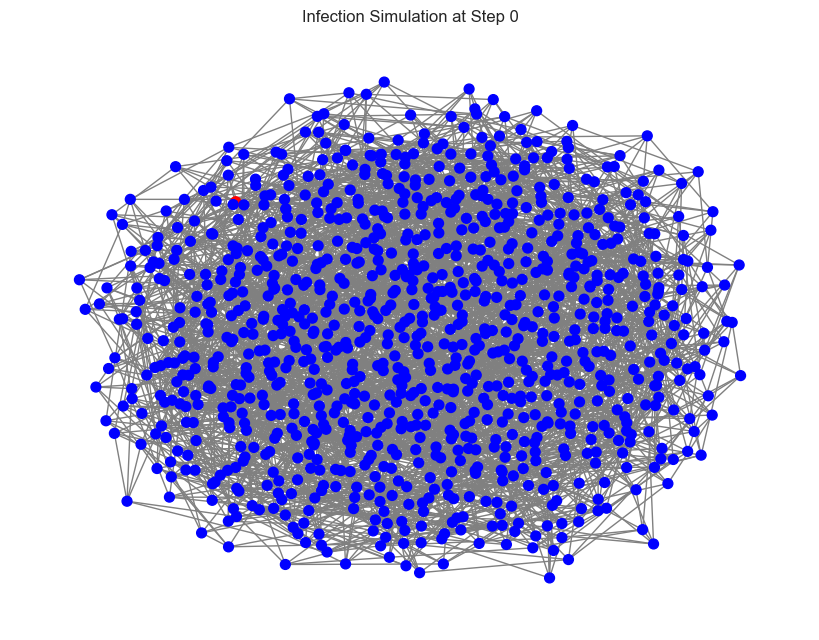

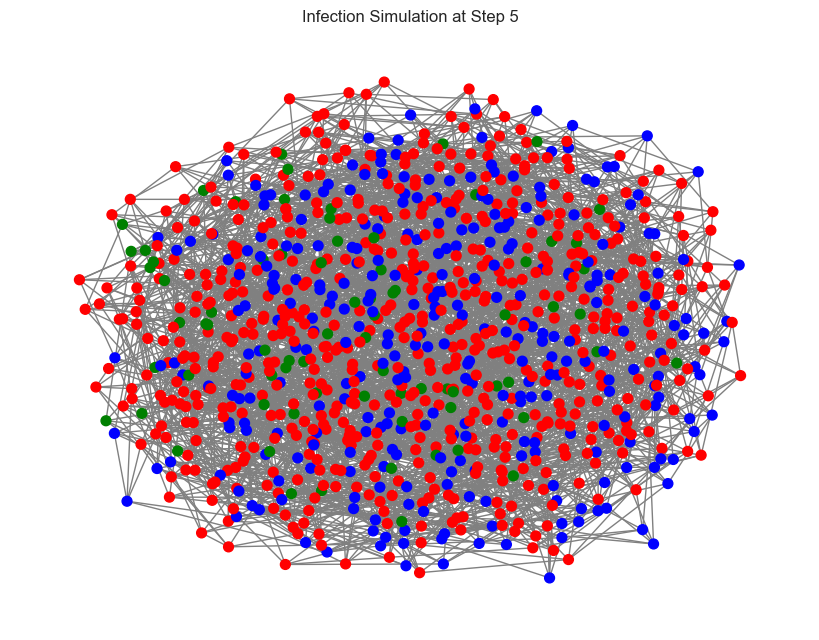

Source node identification using EC & CC: 972 took 19.34 seconds
Source node identification using EC (Jordan Center): [972] took 8.15 seconds
Source node identification using Rumor Centrality: 762 took 17.31 seconds


In [116]:
# Create an Random Regular graph with n nodes and edge probability of p
n = 1000
degree = 6
G, initial_infected = create_random_regular_graph(n, degree)
print("Initial infected node:", initial_infected)

pos = nx.spring_layout(G)
step = 0
plot_graph(G, pos, step)

model = 'SIR'
for _ in range(5):
    step += 1
    simulate_epidemic_step_network(G, 0.7, 0.2, 0.4, model)

plot_graph(G, pos, 5)

candidate_nodes = infection_nodes_network(G) if model in ['SIS', 'SIRS'] else [n for n, attr in G.nodes(data=True) if attr['status'] in [0, 1]]

source_node, taken_time = time_function(find_source_node_EC_CC, G, candidate_nodes)
print(f"Source node identification using EC & CC: {source_node} took {taken_time:.2f} seconds")

source_node, taken_time = time_function(find_jordan_center, G, candidate_nodes)
print(f"Source node identification using EC (Jordan Center): {source_node} took {taken_time:.2f} seconds")

source_node, taken_time = time_function(rumor_centrality, G, candidate_nodes)
print(f"Source node identification using Rumor Centrality: {source_node} took {taken_time:.2f} seconds")

### Visual observations to see if the Jordan grid-based algorithm works and handles boundaries well
INDEED IT DOES :)

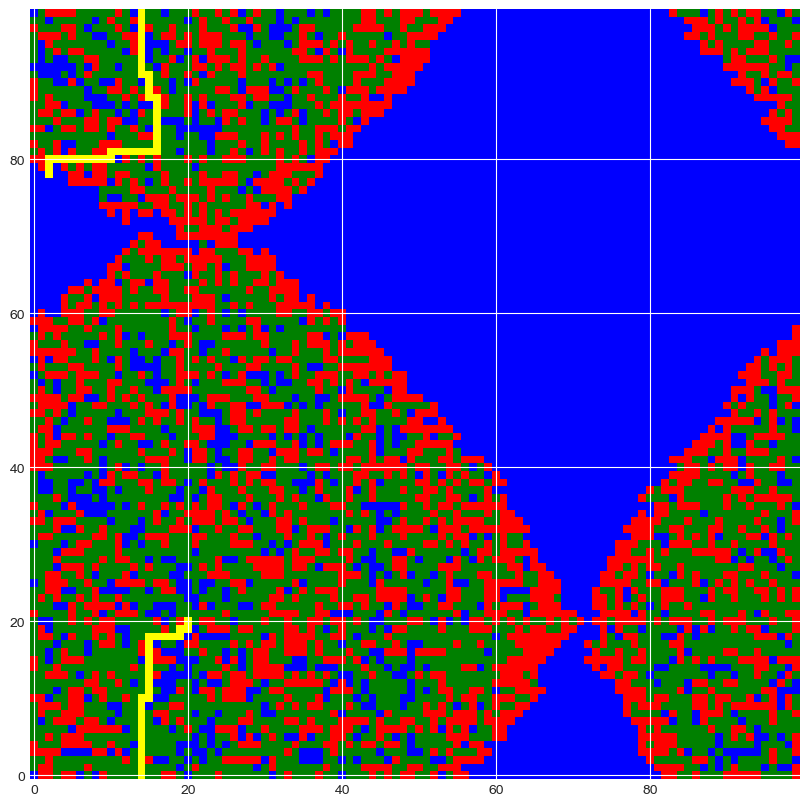

In [315]:
from collections import deque
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, FFMpegWriter

def bfs(grid, start_pos, model, infected_nodes):
    width, height = grid.shape
    visited = np.zeros_like(grid, dtype=np.int32)  # 0 unvisited, 1 visited
    distances = np.full_like(grid, -1, dtype=np.int32)  # -1 for unreachable nodes
    predecessors = np.full((width, height, 2), -1, dtype=np.int32)  # To store predecessors for path reconstruction
    queue = deque()
    queue.append(start_pos)

    visited[start_pos] = 1
    distances[start_pos] = 0

    while queue:
        x, y = queue.popleft()
        base_index = (x * width + y) * 4
        
        for i in range(4):
            neighbor_idx = neighbors_map[base_index + i]
            if neighbor_idx == -1:
                continue

            nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
            
            if visited[nx, ny] == 0 and ((model == 'SIR' and grid[nx, ny] in [0, 1]) or (model in ['SIS', 'SIRS'] and (nx, ny) in infected_nodes)):
                visited[nx, ny] = 1
                distances[nx, ny] = distances[x, y] + 1
                predecessors[nx, ny] = [x, y]
                queue.append((nx, ny))

    return distances, predecessors

def colors_grid():
    # Define the color map for different states
    cmap = mcolors.ListedColormap(['blue', 'red', 'green', 'yellow', 'black'])
    bounds = [-1, 0, 1, 2, 3, 4]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    return cmap, norm    

# Set up the grid and simulate the infection spread
width, height = 100, 100
grid = np.full((width, height), -1)
start_pos = (20, 20)
source_node = (20, 20)
grid[source_node] = 0
model = 'SIRS'
boundary_condition = 'non-fixed'
neighbors_map = get_all_neighbors(width, height, boundary_condition)
for _ in range(60):
    grid = simulate_epidemic_step(grid, 0.7, 0.2, 0.1, boundary_condition, model)
infected_nodes = [(i, j) for i in range(width) for j in range(height) if grid[i, j] in [0, 1]]

# Perform BFS to find distances and predecessors
distances, predecessors = bfs(grid, start_pos, model, infected_nodes)
max_distance = np.max(distances)
farthest_node = np.unravel_index(np.argmax(distances), distances.shape)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 10))
cmap, norm = colors_grid()
grid[start_pos] = 2  # Yellow color for starting node
grid[source_node] = 4  # Black color for starting node

# Reconstruct the path from the farthest node to the start node
path = []
node = farthest_node
while node != start_pos:
    path.append(node)
    node = tuple(predecessors[node[0], node[1]])
path.append(start_pos)
path.reverse()

# Animation function
def update(frame):
    if frame < len(path):
        x, y = path[frame]
        grid[x, y] = 2  # Black color for the path node
    ax.imshow(grid, cmap=cmap, norm=norm)  # Update the grid
    plt.gca().invert_yaxis()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(path), repeat=False)

# Ensure ani stays in scope until it is saved
ani.save('jordan_center_animation.mp4', writer='ffmpeg', fps=5)

# Keeping the animation object in scope
animation = ani

### Visualization of the implemented flood fill algorithm

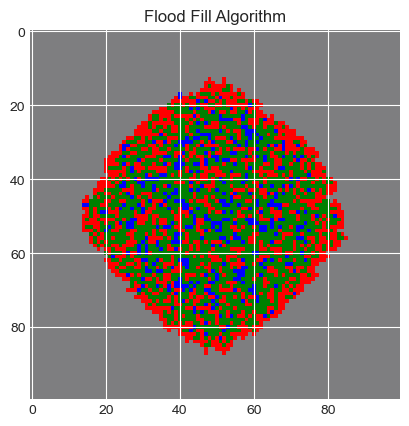

In [316]:
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

def flood_fill(grid, mask, start_i, start_j, target_val, fill_value, frames, capture_rate=1):
    stack = {(start_i, start_j)}  # Using a set to avoid duplicate positions
    steps = 0
    while stack:
        x, y = stack.pop()
        if mask[x, y] != fill_value and grid[x, y] == target_val:
            mask[x, y] = fill_value
            if steps % capture_rate == 0:
                frames.append(mask.copy())
            steps += 1
            base_idx = (x * width + y) * 4
            for k in range(4):  # Changed loop variable to k to avoid confusion with i, j
                neighbor_idx = neighbors_map[base_idx + k]
                if neighbor_idx != -1:  # Valid neighbor index
                    nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
                    if mask[nx, ny] != fill_value:
                        stack.add((nx, ny))

def find_external_boundary_grid(grid):
    height, width = grid.shape
    infected_val = 0  # Infected nodes
    susceptible_val = -1  # Susceptible nodes

    # Step 1: Identify All Potential Boundary Nodes
    potential_boundary = np.zeros_like(grid, dtype=bool)
    for i in range(height):
        for j in range(width):
            if grid[i, j] == infected_val:
                base_idx = (i * width + j) * 4
                for k in range(4):
                    neighbor_idx = neighbors_map[base_idx + k]
                    if neighbor_idx != -1:
                        nx, ny = divmod(neighbor_idx, width)
                        if grid[nx, ny] == susceptible_val:
                            potential_boundary[i, j] = True
                            break

    # Step 2: Flood Fill from Grid Edges
    mask = np.zeros_like(grid, dtype=bool)
    frames = []
    capture_rate = max((height * width) // (20 * 30), 1)  # Capture frames to fit a 20 seconds video at 30 fps
    edge_indices = np.hstack((np.arange(0, width), np.arange(grid.size - width, grid.size)))
    for edge_idx in edge_indices:
        i, j = divmod(edge_idx, width)
        if grid[i, j] == susceptible_val and not mask[i, j]:
            flood_fill(grid, mask, i, j, susceptible_val, True, frames, capture_rate=capture_rate)

    # Step 3: Identify Internal Potential Boundary Nodes
    internal_potential_boundary = np.zeros_like(grid, dtype=bool)
    for i in range(height):
        for j in range(width):
            if potential_boundary[i, j]:
                base_idx = (i * width + j) * 4
                for k in range(4):
                    neighbor_idx = neighbors_map[base_idx + k]
                    if neighbor_idx != -1:
                        nx, ny = divmod(neighbor_idx, width)  # Convert flat index to 2D indices
                        if mask[nx, ny]:
                            internal_potential_boundary[i, j] = True
                            break

    # Step 4: Isolate Actual Boundary Nodes
    actual_boundary = potential_boundary & internal_potential_boundary

    return actual_boundary, frames

# Sample grid and parameters
height, width = 100, 100
grid = np.full((width, height), -1)
source_node = (50, 50)
grid[source_node] = 0
boundary_condition = 'non-fixed'
model = 'SIRS'
neighbors_map = get_all_neighbors(width, height, boundary_condition)
for _ in range(45):
    grid = simulate_epidemic_step(grid, 0.7, 0.2, 0.1, boundary_condition, model)

boundary_grid, frames = find_external_boundary_grid(grid)

# Create animation
fig, ax = plt.subplots()
cmap = ListedColormap(['blue', 'red', 'green'])
norm = plt.cm.colors.BoundaryNorm([-1, 0, 1, 2], cmap.N)

def update(frame):
    ax.clear()
    ax.imshow(grid, cmap=cmap, norm=norm)
    ax.imshow(np.ma.masked_where(frame == 0, frame), cmap=ListedColormap(['yellow']), alpha=0.5)
    ax.set_title("Flood Fill Algorithm")

ani = animation.FuncAnimation(fig, update, frames=frames, repeat=False)
ani.save('flood_fill_animation.mp4', writer='ffmpeg', fps=30)

plt.show()

## SIRS Model Simulation Using the Gillespie Algorithm

We simulate the spread of an infectious disease using the SIRS (Susceptible-Infected-Recovered-Susceptible) model. We employ the Gillespie Algorithm, a stochastic simulation algorithm, to accurately model the time evolution of the infection process. This method allows us to account for the inherent randomness in disease transmission and recovery, which is especially important in small populations or early stages of an outbreak.

* The Gillespie Algorithm, also known as the Stochastic Simulation Algorithm (SSA), is a continuous-time simulation method that accurately tracks the time between events in a stochastic system. It has the following key characteristics:
    * **Continuous-Time Simulation:** The Gillespie Algorithm determines the time until the next event using an exponential distribution, which allows for a more precise representation of the timing of events.
    * **Event-Based:** The algorithm focuses on individual events (such as infection, recovery, and loss of immunity) and calculates the exact time and type of the next event.
    * **Stochastic Nature:** The algorithm inherently accounts for the randomness in both the timing of events and which event occurs next, providing a more accurate stochastic representation of the system.


### Model Parameters and Initial Conditions

We define the following parameters for our SIRS model:
- **Infection rate (β)**: The rate at which susceptible individuals become infected upon contact with infected individuals.
- **Recovery rate (γ)**: The rate at which infected individuals recover and move to the recovered compartment.
- **Loss of immunity rate (δ)**: The rate at which recovered individuals lose their immunity and become susceptible again.
- **Total population (N)**: The fixed total population size.
- **Initial conditions**: The initial numbers of susceptible (S0), infected (I0), and recovered (R0) individuals.

### Gillespie Algorithm

The Gillespie Algorithm is used to simulate the discrete events of infection, recovery, and loss of immunity over time. The algorithm proceeds as follows:
1. **Initialize** the system with the initial numbers of susceptible, infected, and recovered individuals.
2. **Calculate reaction rates** for each event:
   - **Infection rate**: (β SI/N)
   - **Recovery rate**: (γ I)
   - **Loss of immunity rate**: (δ R)
3. **Determine the time to the next event** using an exponential distribution with the total rate.
4. **Select which event occurs** based on the relative probabilities of each event.
5. **Update the state** (numbers of S, I, and R) and the current time.
6. **Repeat** steps 2-5 until the maximum simulation time is reached or the infection dies out.

### Calculating the Speed of Infection

The speed of infection is an important metric that quantifies how quickly the disease spreads through the population. We calculate the speed of infection as the slope of the infected curve at the beginning of the outbreak. Specifically, we use the following steps:
1. **Run the simulation** to obtain the time series of the number of infected individuals.
2. **Calculate the initial infection rate** as the change in the number of infected individuals over the change in time at the beginning of the outbreak.
3. **Estimate the speed of infection** by dividing the change in the number of infected individuals by the change in time over a small initial interval.

The initial speed of infection gives us an idea of how rapidly the disease is spreading when the outbreak begins.

### Python Implementation

The following code implements the SIRS model simulation using the Gillespie Algorithm and calculates the speed of infection. The results are plotted to visualize the dynamics of the disease spread over time.

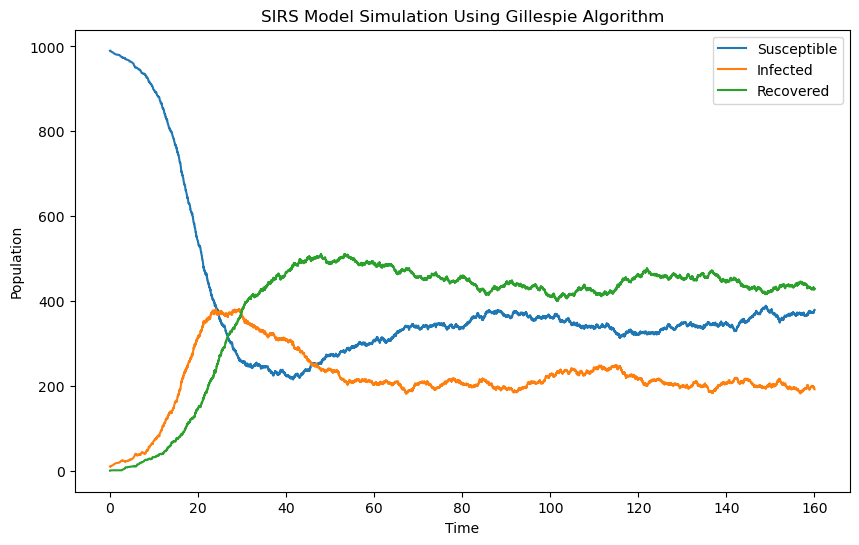

Initial speed of infection: 5.3972 individuals per unit time


In [16]:
# Parameters
beta = 0.3      # Infection rate
gamma = 0.1     # Recovery rate
delta = 0.05    # Loss of immunity rate
N = 1000        # Total population
S0 = 990        # Initial number of susceptible individuals
I0 = 10         # Initial number of infected individuals
R0 = 0          # Initial number of recovered individuals

# Initialize state
S = S0
I = I0
R = R0

# Gillespie Algorithm implementation
def gillespie_sirs(S, I, R, beta, gamma, delta, N, max_time):
    time = 0
    times = [0]
    S_values = [S]
    I_values = [I]
    R_values = [R]

    while time < max_time and I > 0:
        # Calculate reaction rates
        infection_rate = beta * S * I / N
        recovery_rate = gamma * I
        loss_of_immunity_rate = delta * R
        
        total_rate = infection_rate + recovery_rate + loss_of_immunity_rate
        if total_rate == 0:
            break
        
        # Time to next event
        tau = np.random.exponential(1 / total_rate)
        
        # Determine which event occurs
        event = np.random.choice(
            ["infection", "recovery", "loss_of_immunity"], 
            p=[infection_rate / total_rate, recovery_rate / total_rate, loss_of_immunity_rate / total_rate]
        )
        
        if event == "infection":
            S -= 1
            I += 1
        elif event == "recovery":
            I -= 1
            R += 1
        elif event == "loss_of_immunity":
            R -= 1
            S += 1
        
        # Update time and state
        time += tau
        times.append(time)
        S_values.append(S)
        I_values.append(I)
        R_values.append(R)

    return times, S_values, I_values, R_values

# Run simulation
max_time = 160
times, S_values, I_values, R_values = gillespie_sirs(S, I, R, beta, gamma, delta, N, max_time)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(times, S_values, label="Susceptible")
plt.plot(times, I_values, label="Infected")
plt.plot(times, R_values, label="Recovered")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("SIRS Model Simulation Using Gillespie Algorithm")
plt.show()

# Calculate speed of infection
# Speed can be calculated as the slope of the infected curve at the beginning of the outbreak
initial_infection_rate = (I_values[15] - I_values[5]) / (times[15] - times[5])
print(f"Initial speed of infection: {initial_infection_rate:.4f} individuals per unit time")

## Investigating Epidemic Spread in Tree Structures

In this section, we will explore how an infectious process spreads within tree structures. Trees are a type of graph consisting of nodes and edges where any two vertices are connected by exactly one path (avoiding the complexities introduced by *cycles* and *multiple paths*).

The spread of infection in tree structures is crucial since it brings:

* **Simplicity:** Trees allow for clearer analytical insights into the dynamics of the spread due to their simple structure.
* **Hierarchical Spread Modeling:** Many real-world systems (organizational structures, family trees, and certain types of communication networks) naturally follow a tree-like hierarchy.

We will simulate an SIRS epidemic model on various tree graphs. The focus will be on observing how the infection spreads through the tree over time, the impact of various parameters on the spread, and the time it takes for the infection to reach different parts of the tree.

Objectives:

* **Generate Tree Structures:** Utilize different tree generation techniques to create models for our simulations.

* **Analyze Spread Dynamics:** Investigate the role of tree depth, branching factor, and model parameters (infection rate, recovery rate, and loss of immunity rate) in the spread dynamics.
Visualize Outcomes: Use plots and animations to visualize the spread of infection over time across the tree structure.

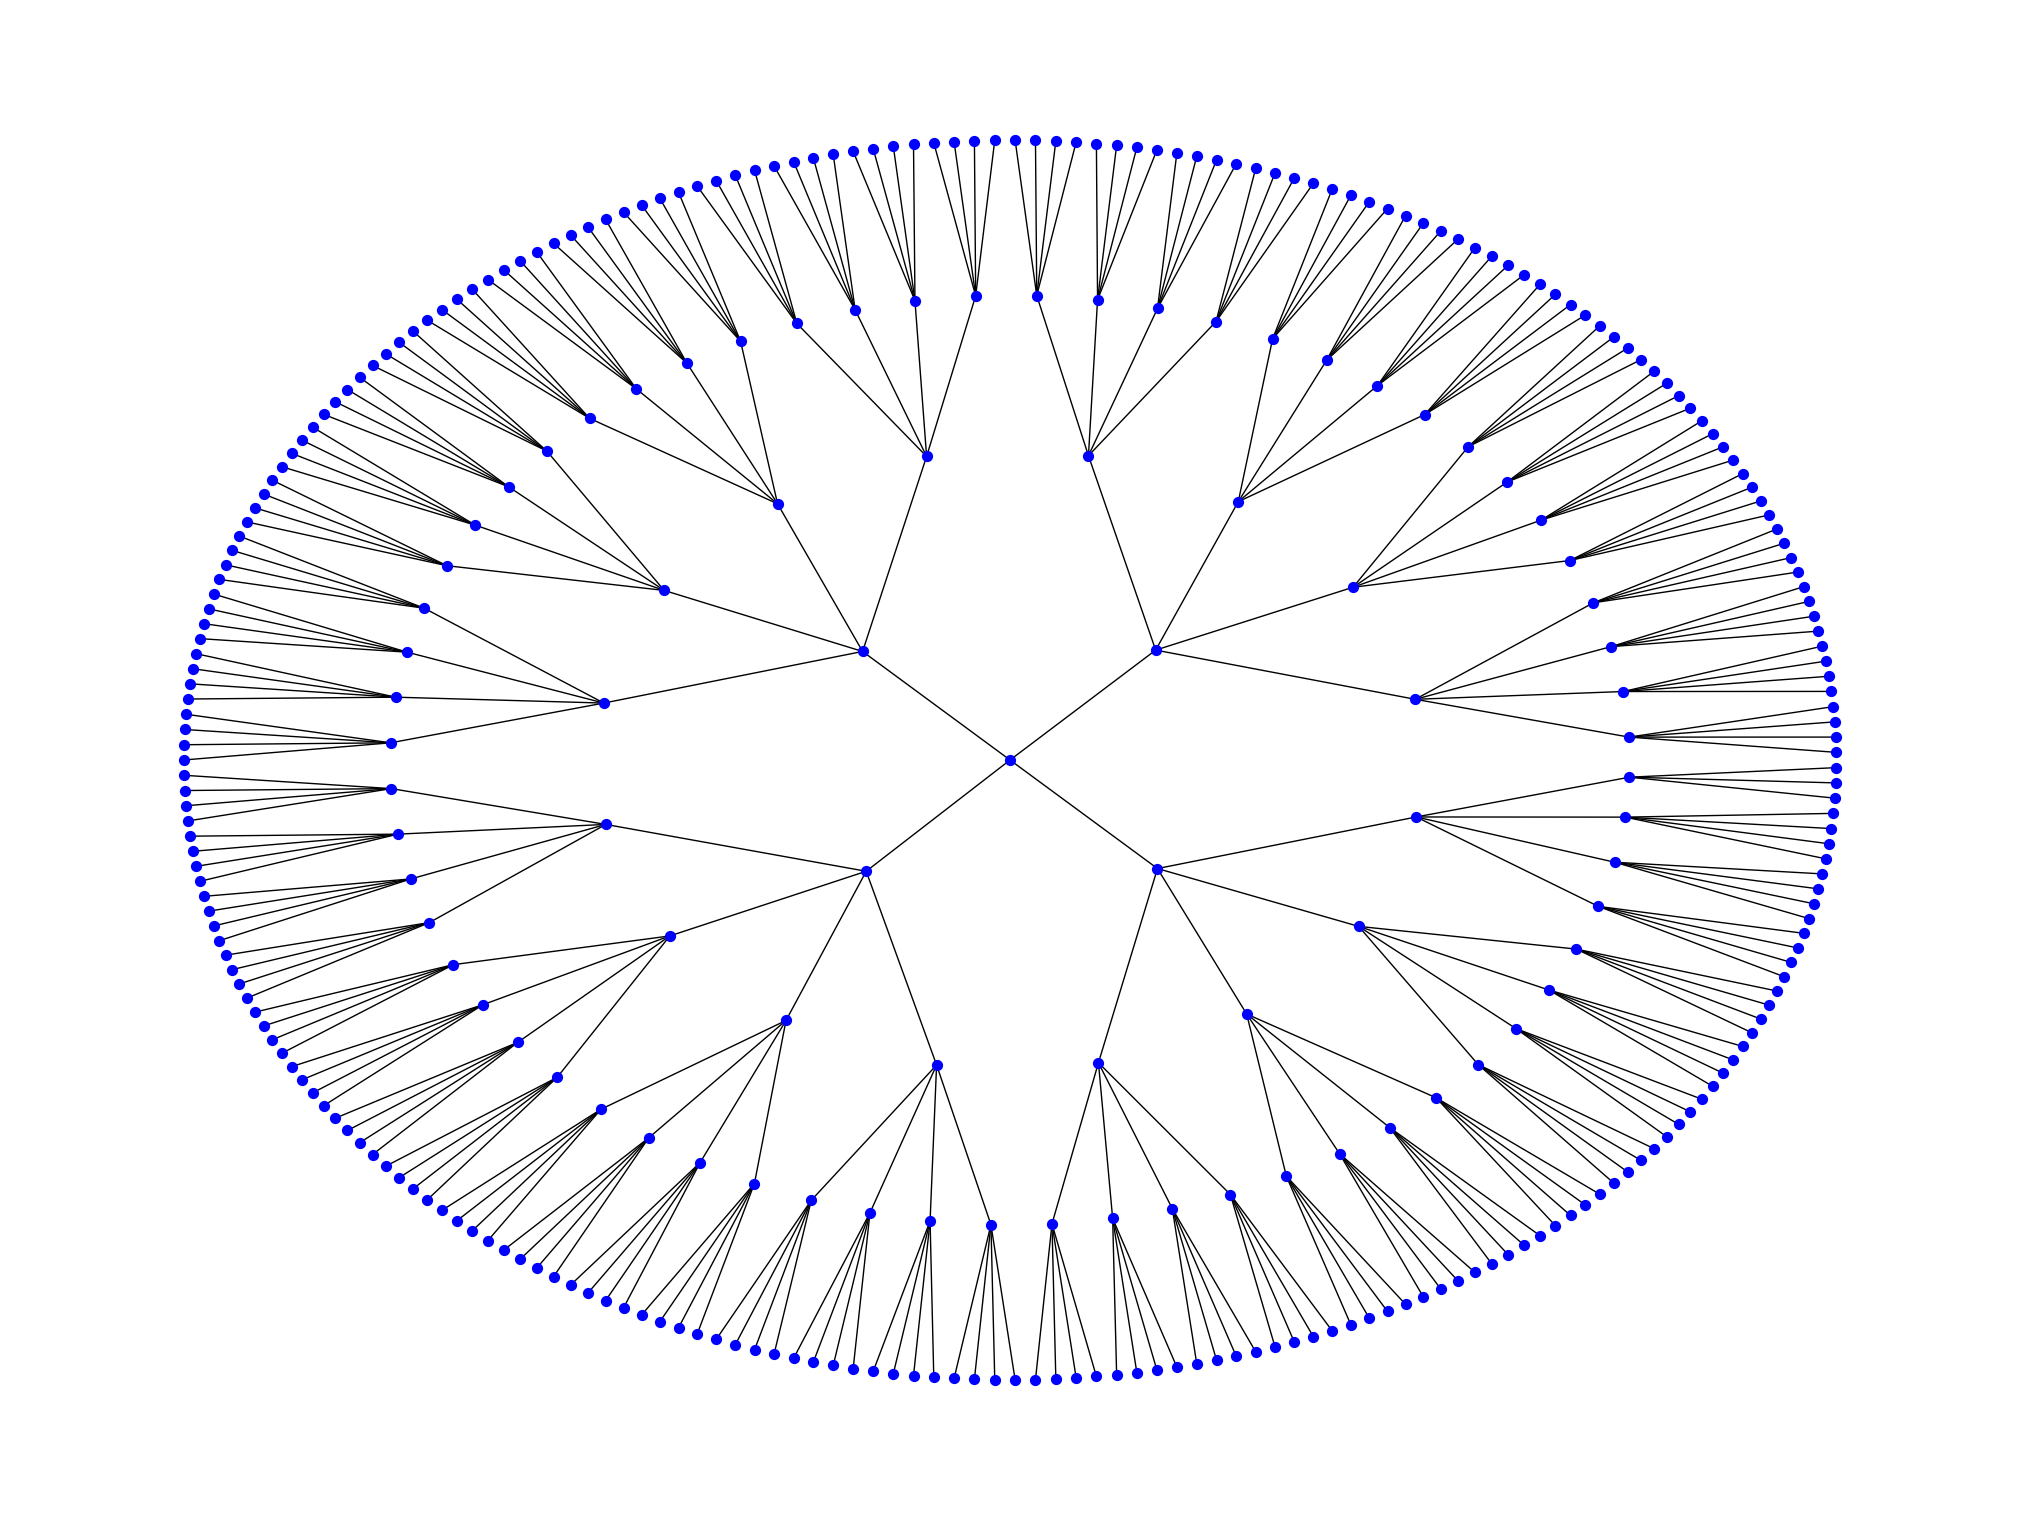

In [63]:
# Parameters for the tree
num_vertices = 340  # Target number of vertices in the tree
children_count = 4  # Branching factor

# Calculate the necessary height to get close to the desired number of vertices
height = 1
while True:
    num_nodes = (children_count**(height + 1) - 1) // (children_count - 1)
    if num_nodes >= num_vertices:
        break
    height += 1

# Generate the tree using the calculated height
tree = nx.balanced_tree(children_count, height, create_using=nx.DiGraph())

# Trim the tree to get exactly num_vertices nodes
if len(tree) > num_vertices:
    nodes_to_remove = len(tree) - target_num_vertices
    tree.remove_nodes_from(sorted(tree.nodes())[-nodes_to_remove:])

# Generate layout for the tree
pos = nx.drawing.nx_agraph.graphviz_layout(tree, prog="twopi")

# Visualization
plt.figure(figsize=(20, 15))  # Adjust figure size for clarity
nx.draw(tree, pos, with_labels=False, node_size=50, node_color="blue", arrows=False)
plt.axis('off')  # Hide axes for cleaner visualization
plt.show()